In [1]:
pip install kaleido

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install termcolor

Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from termcolor import colored
import plotly.express as px
import kaleido
from sklearn.preprocessing import StandardScaler
import matplotlib.image as mpimg
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
import math

In [4]:
df= pd.read_csv('Country-data.csv')

In [5]:
df.shape

(167, 10)

In [6]:
df

country  child_mort  exports  health  imports  income  \
0            Afghanistan        90.2     10.0    7.58     44.9    1610   
1                Albania        16.6     28.0    6.55     48.6    9930   
2                Algeria        27.3     38.4    4.17     31.4   12900   
3                 Angola       119.0     62.3    2.85     42.9    5900   
4    Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   
..                   ...         ...      ...     ...      ...     ...   
162              Vanuatu        29.2     46.6    5.25     52.7    2950   
163            Venezuela        17.1     28.5    4.91     17.6   16500   
164              Vietnam        23.3     72.0    6.84     80.2    4490   
165                Yemen        56.3     30.0    5.18     34.4    4480   
166               Zambia        83.1     37.0    5.89     30.9    3280   

     inflation  life_expec  total_fer   gdpp  
0         9.44        56.2       5.82    553  
1         4.49        76.3       1.65   4090  
2        16.10        76.5       2.89   4460  
3        22.40        60.1       6.16   3530  
4         1.44        76.8       2.13  12200  
..         ...         ...        ...    ...  
162       2.62        63.0       3.50   2970  
163      45.90        75.4       2.47  13500  
164      12.10        73.1       1.95   1310  
165      23.60        67.5       4.67   1310  
166      14.00        52.0       5.40   1460  

[167 rows x 10 columns]

In [7]:
#check missing value

In [8]:
df.isnull().sum()

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [9]:
len(df['country'].unique())

167

In [10]:
df.describe().T

count          mean           std       min       25%      50%  \
child_mort  167.0     38.270060     40.328931    2.6000     8.250    19.30   
exports     167.0     41.108976     27.412010    0.1090    23.800    35.00   
health      167.0      6.815689      2.746837    1.8100     4.920     6.32   
imports     167.0     46.890215     24.209589    0.0659    30.200    43.30   
income      167.0  17144.688623  19278.067698  609.0000  3355.000  9960.00   
inflation   167.0      7.781832     10.570704   -4.2100     1.810     5.39   
life_expec  167.0     70.555689      8.893172   32.1000    65.300    73.10   
total_fer   167.0      2.947964      1.513848    1.1500     1.795     2.41   
gdpp        167.0  12964.155689  18328.704809  231.0000  1330.000  4660.00   

                 75%        max  
child_mort     62.10     208.00  
exports        51.35     200.00  
health          8.60      17.90  
imports        58.75     174.00  
income      22800.00  125000.00  
inflation      10.75     104.00  
life_expec     76.80      82.80  
total_fer       3.88       7.49  
gdpp        14050.00  105000.00

In [11]:
# Check duplicated data
print(colored(f"Number of dupilcated data: {df.duplicated().sum()}"))

Number of dupilcated data: 0


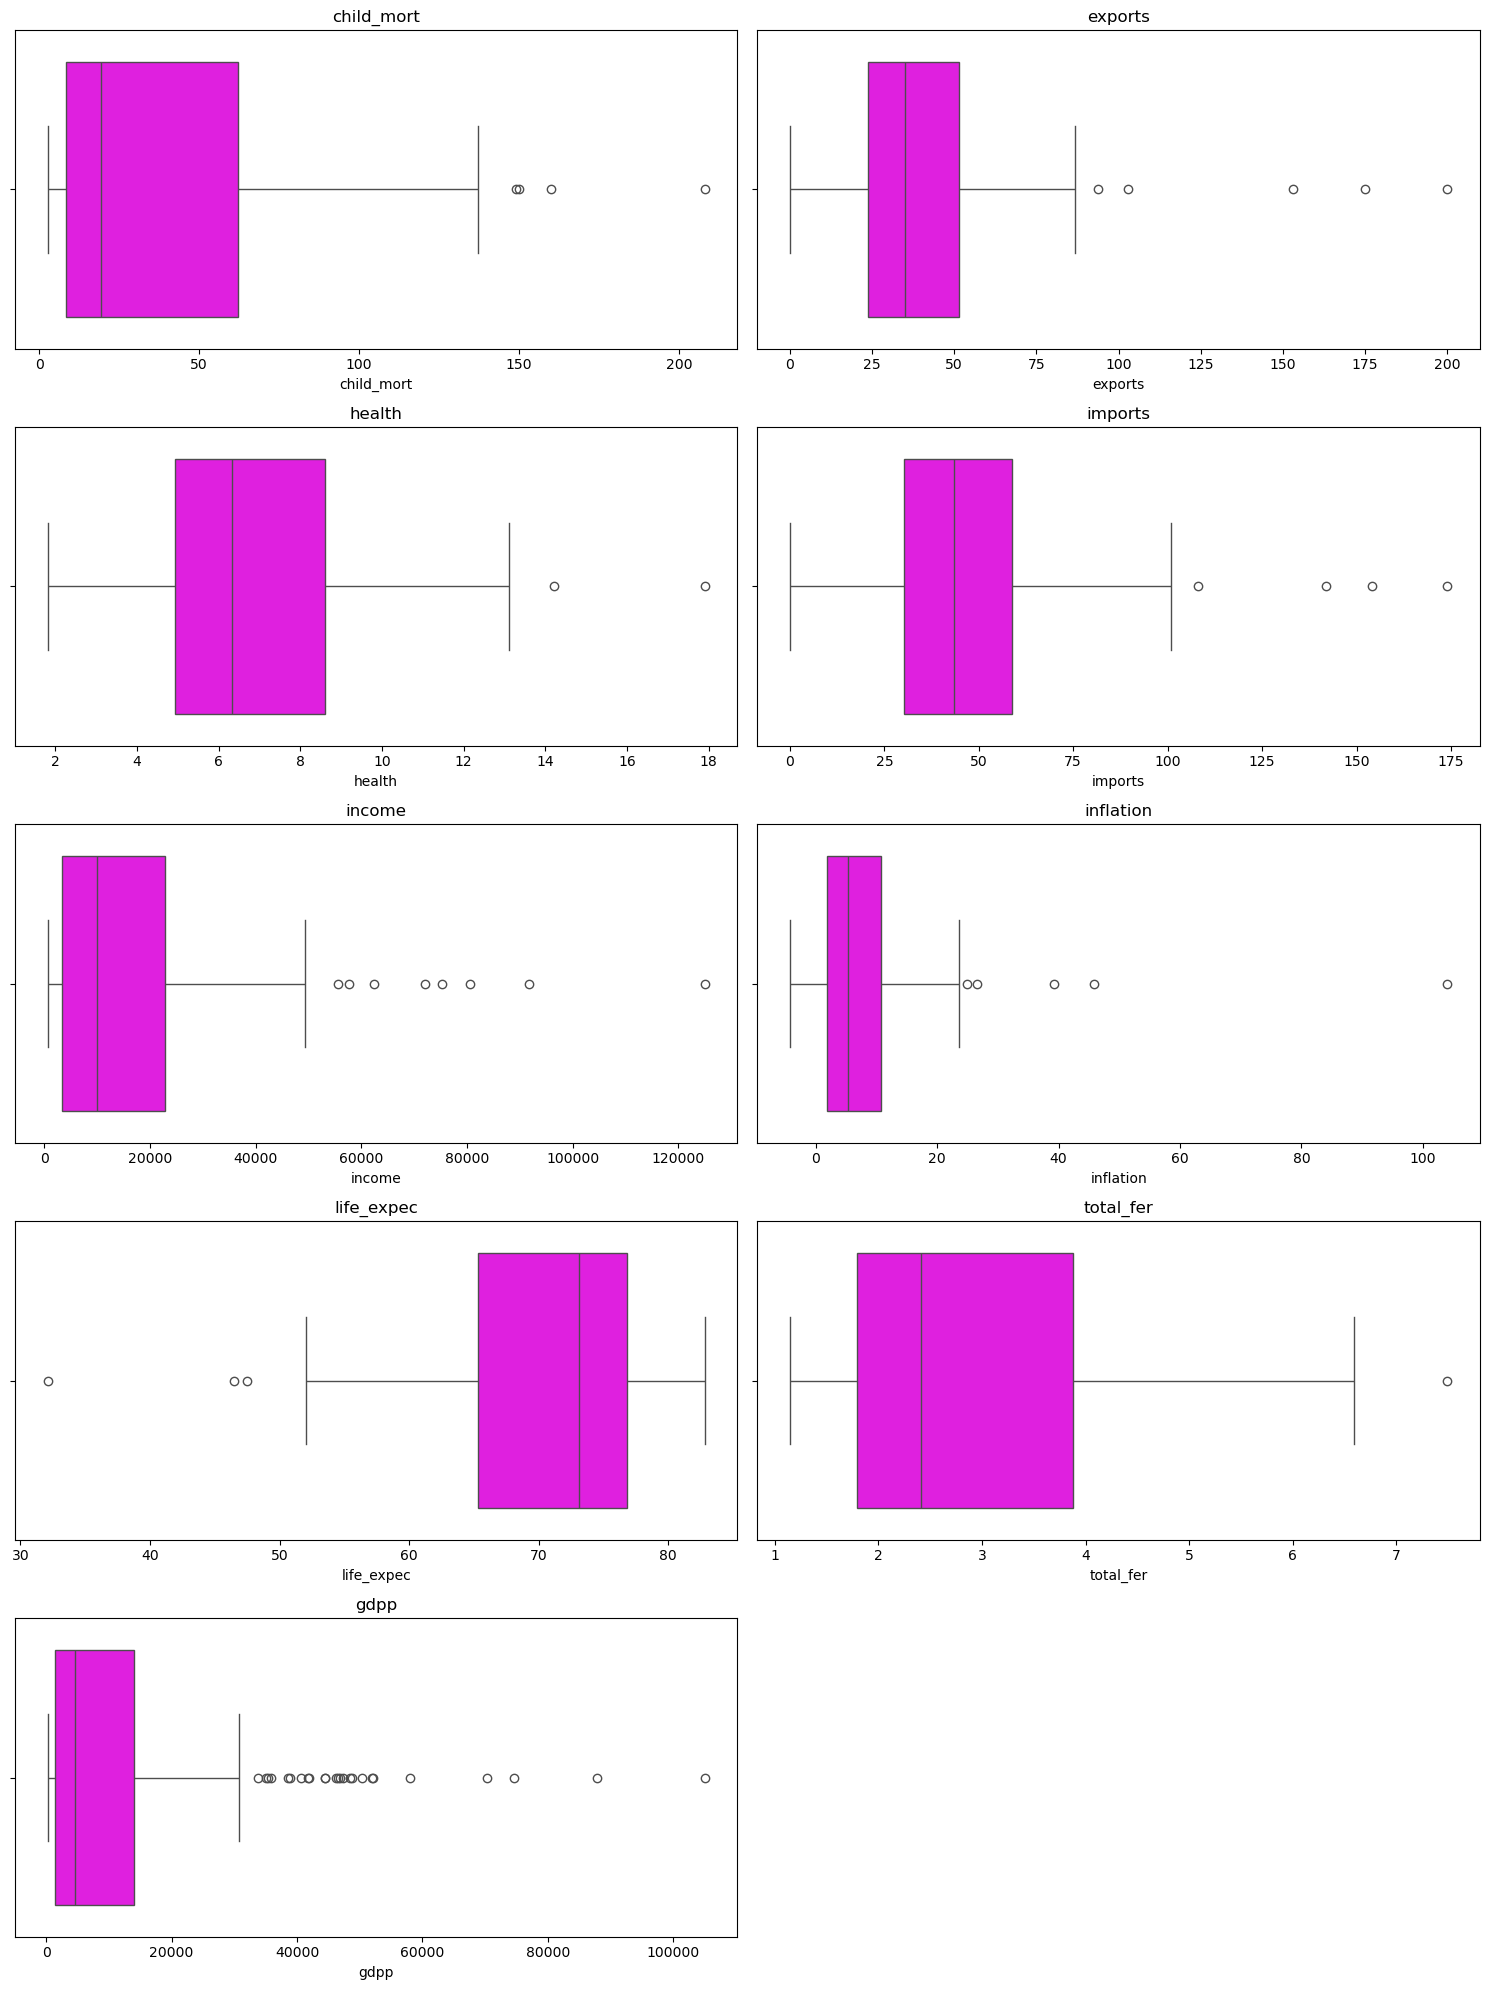

In [12]:
# Noise detection
df1 = pd.DataFrame(df, columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp'])
columns = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
plt.figure(figsize=(15,20))
for i, col in enumerate (df1.columns):
    ax= plt.subplot(5,2,i+1)
    sns.boxplot(x= columns[i], data=df1, color='magenta' )
    plt.title(df1.columns[i])
    plt.tight_layout()
plt.show()

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/50304769.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1[col], hist=True , hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})
/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/50304769.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de

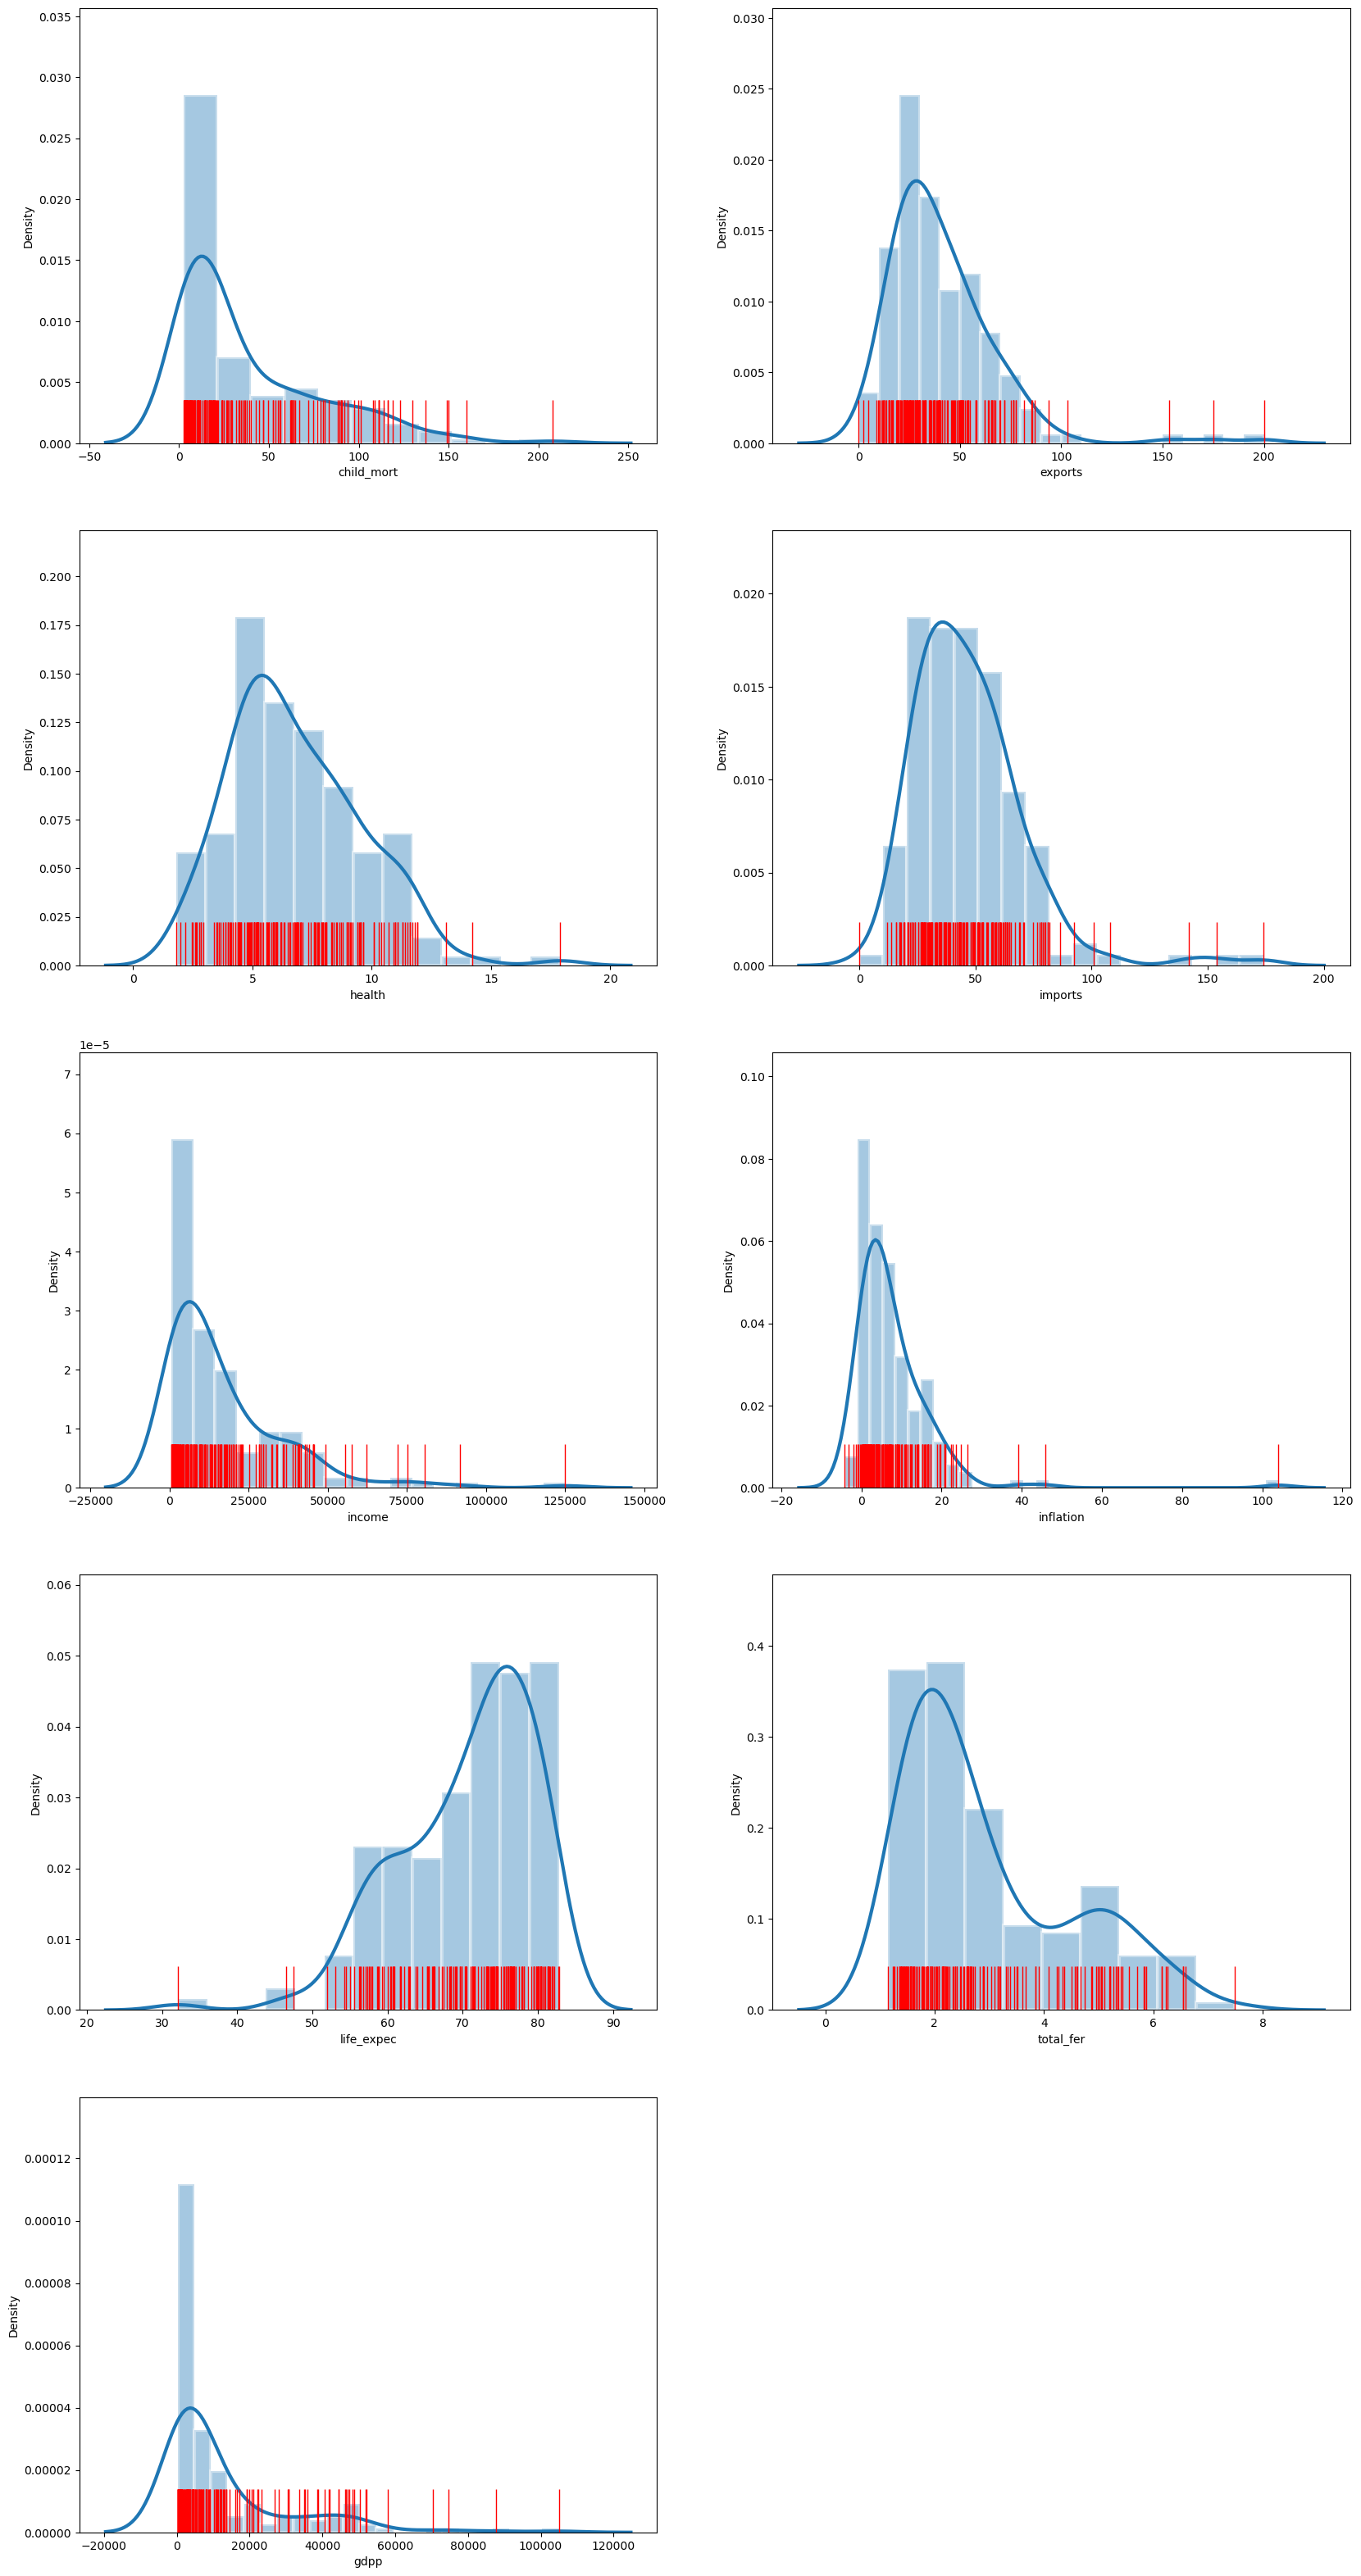

In [13]:
i=1
plt.figure(figsize= (20,40))
for col in df1.columns:
    plt.subplot(5,2,i)
    sns.distplot(df1[col], hist=True , hist_kws={"edgecolor": 'w', "linewidth": 3}, kde_kws={"linewidth": 3})
#This function combines the matplotlib hist function with the seaborn kdeplot()
    sns.rugplot(df1[col], height=.1, clip_on=False, color='red')#This function is intended to complement other plots by showing the location of individual observations
    i=i+1
plt.show()

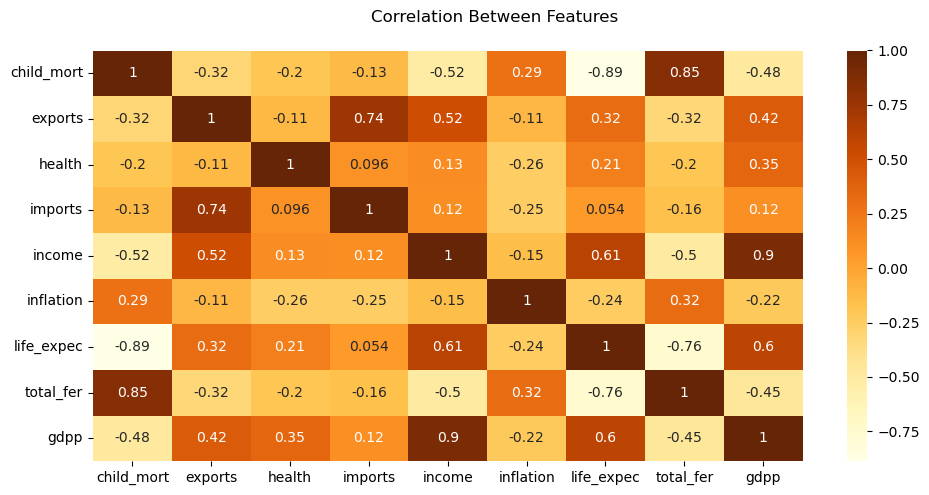

In [14]:
# Check correlation between features
plt.figure(figsize=(10,5), dpi=100)
sns.heatmap(df1.corr(), annot=True, cmap='YlOrBr')
plt.suptitle(f"Correlation Between Features")
plt.tight_layout()
plt.show()

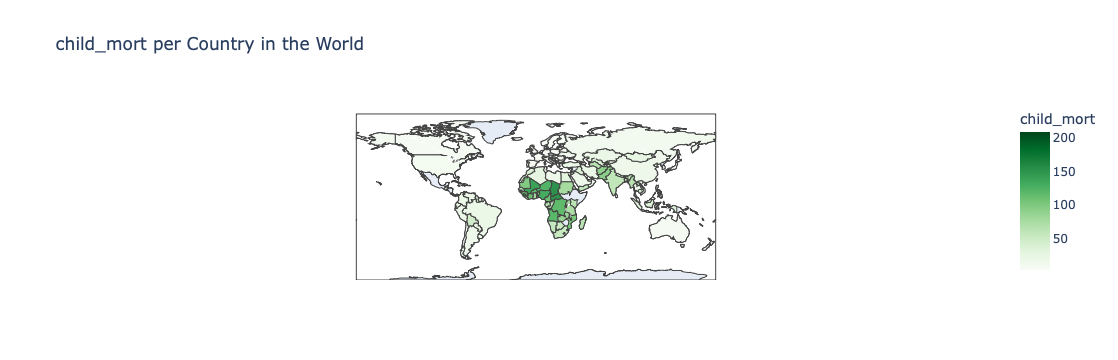

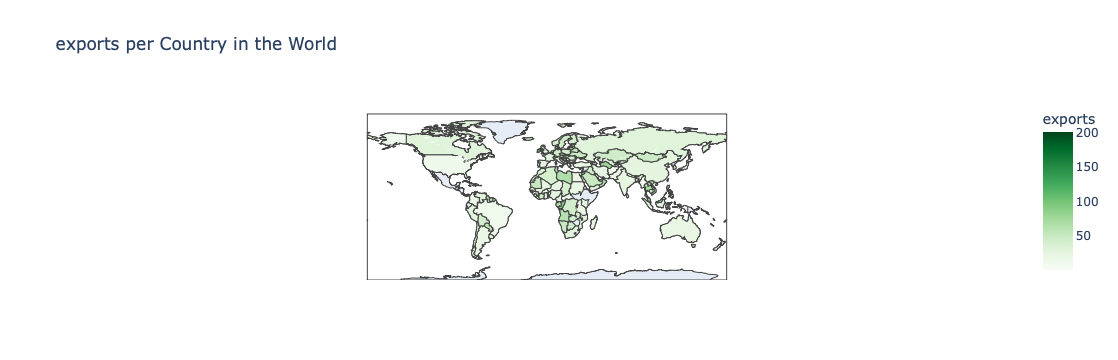

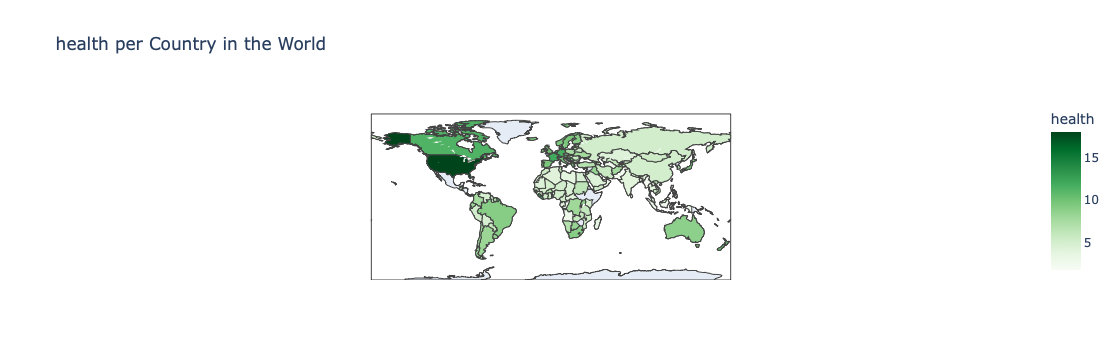

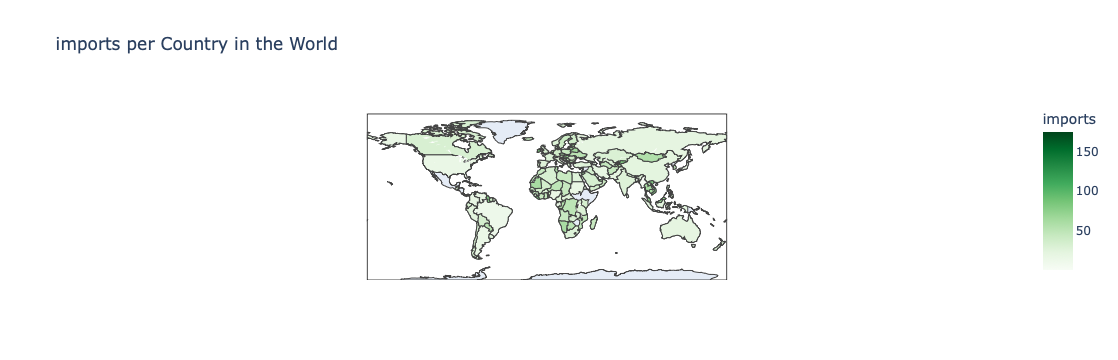

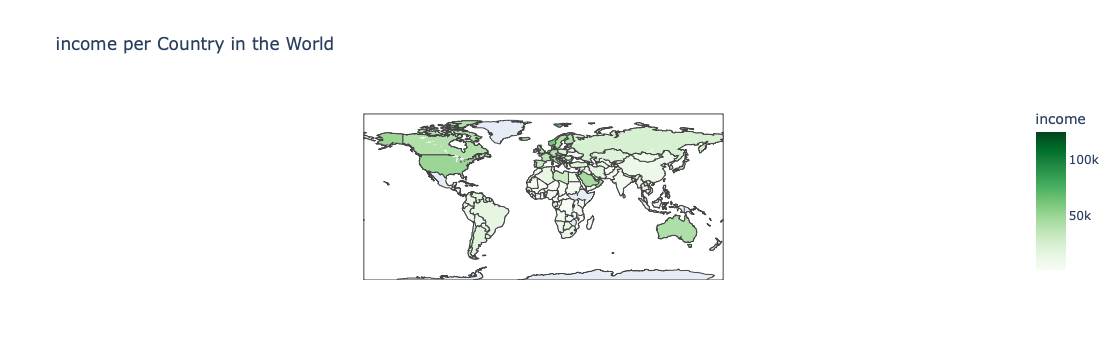

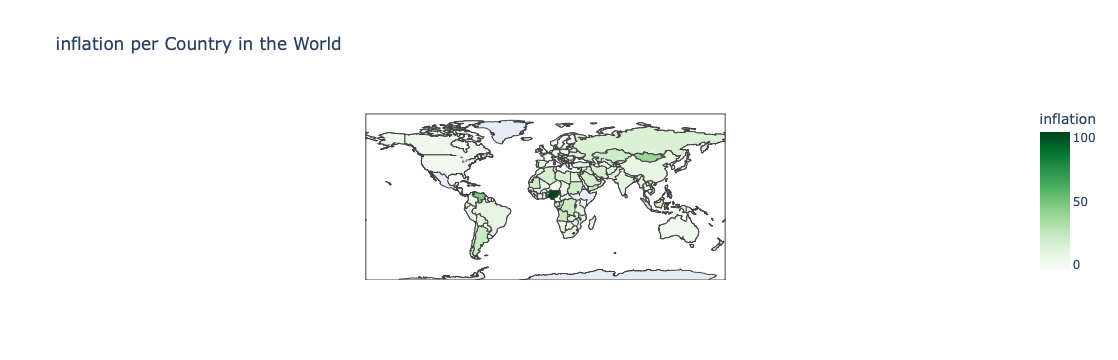

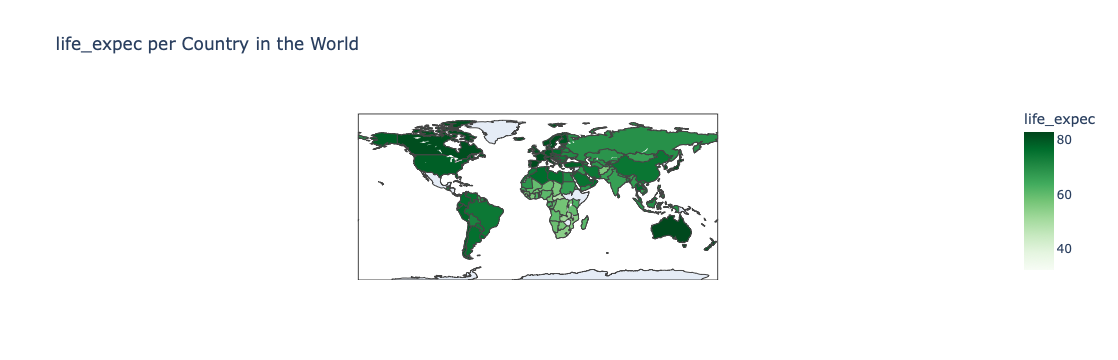

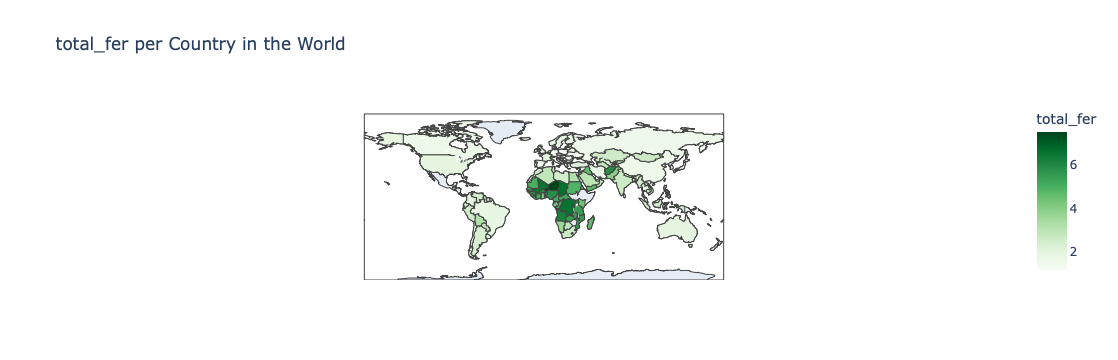

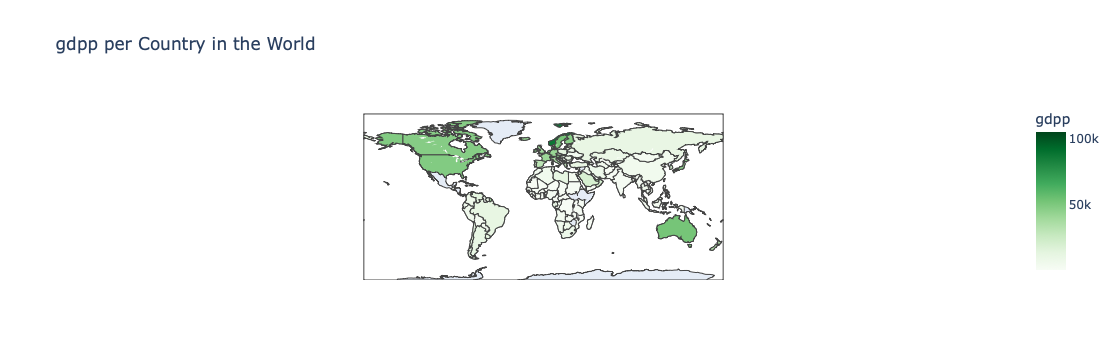

In [15]:
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df, locationmode='country names', locations='country',
                         title=i+' per Country in the World',color=i,color_continuous_scale="Greens")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

In [16]:
df1

child_mort  exports  health  imports  income  inflation  life_expec  \
0          90.2     10.0    7.58     44.9    1610       9.44        56.2   
1          16.6     28.0    6.55     48.6    9930       4.49        76.3   
2          27.3     38.4    4.17     31.4   12900      16.10        76.5   
3         119.0     62.3    2.85     42.9    5900      22.40        60.1   
4          10.3     45.5    6.03     58.9   19100       1.44        76.8   
..          ...      ...     ...      ...     ...        ...         ...   
162        29.2     46.6    5.25     52.7    2950       2.62        63.0   
163        17.1     28.5    4.91     17.6   16500      45.90        75.4   
164        23.3     72.0    6.84     80.2    4490      12.10        73.1   
165        56.3     30.0    5.18     34.4    4480      23.60        67.5   
166        83.1     37.0    5.89     30.9    3280      14.00        52.0   

     total_fer   gdpp  
0         5.82    553  
1         1.65   4090  
2         2.89   4460  
3         6.16   3530  
4         2.13  12200  
..         ...    ...  
162       3.50   2970  
163       2.47  13500  
164       1.95   1310  
165       4.67   1310  
166       5.40   1460  

[167 rows x 9 columns]

# EDA

# country vs numerical features

## child_mort : Economically backward nations have a high infant mortality rate!

In [20]:
np.median(df1['child_mort'])

19.3

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/47651932.py:5: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/47651932.py:12: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/47651932.py:19: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




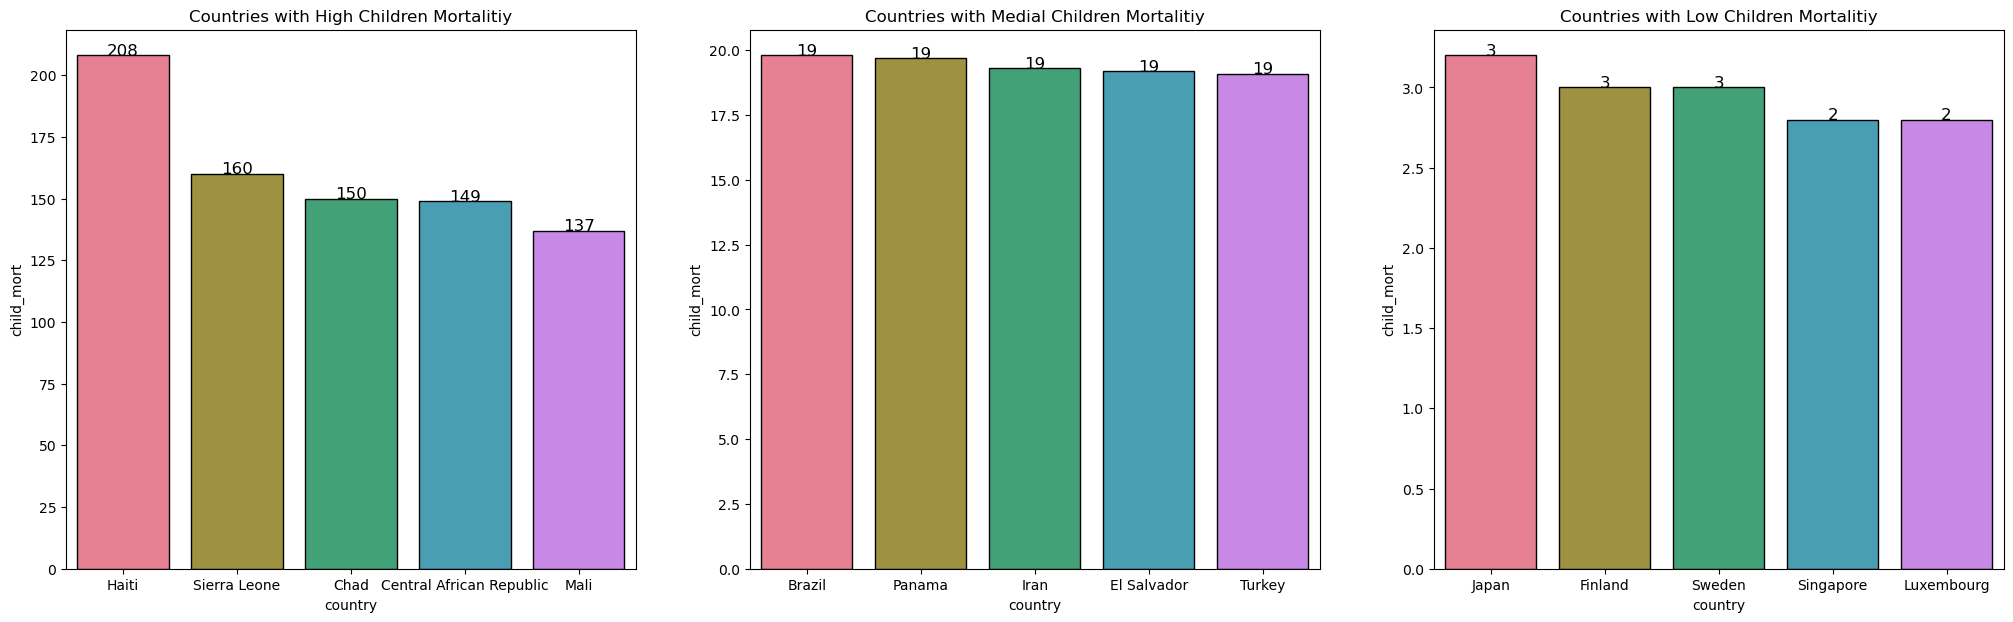

In [21]:
# Define a color palette
colors = sns.color_palette("husl", 5)  # You can change "husl" to other palettes if desired
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'child_mort', data = df.sort_values(ascending = False,by = 'child_mort').iloc[:5],palette=colors ,edgecolor = 'black');
plt.title('Countries with High Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'child_mort', data = df.sort_values(ascending = False,by = 'child_mort').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'child_mort', data = df.sort_values(ascending = False,by = 'child_mort').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Children Mortalitiy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

### exports : It is a very important factor for building the nation's economy. 
### Higher the exports of a nation, stronger the nation's economy and more is the wealth generated by the natio

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2292371634.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2292371634.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2292371634.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




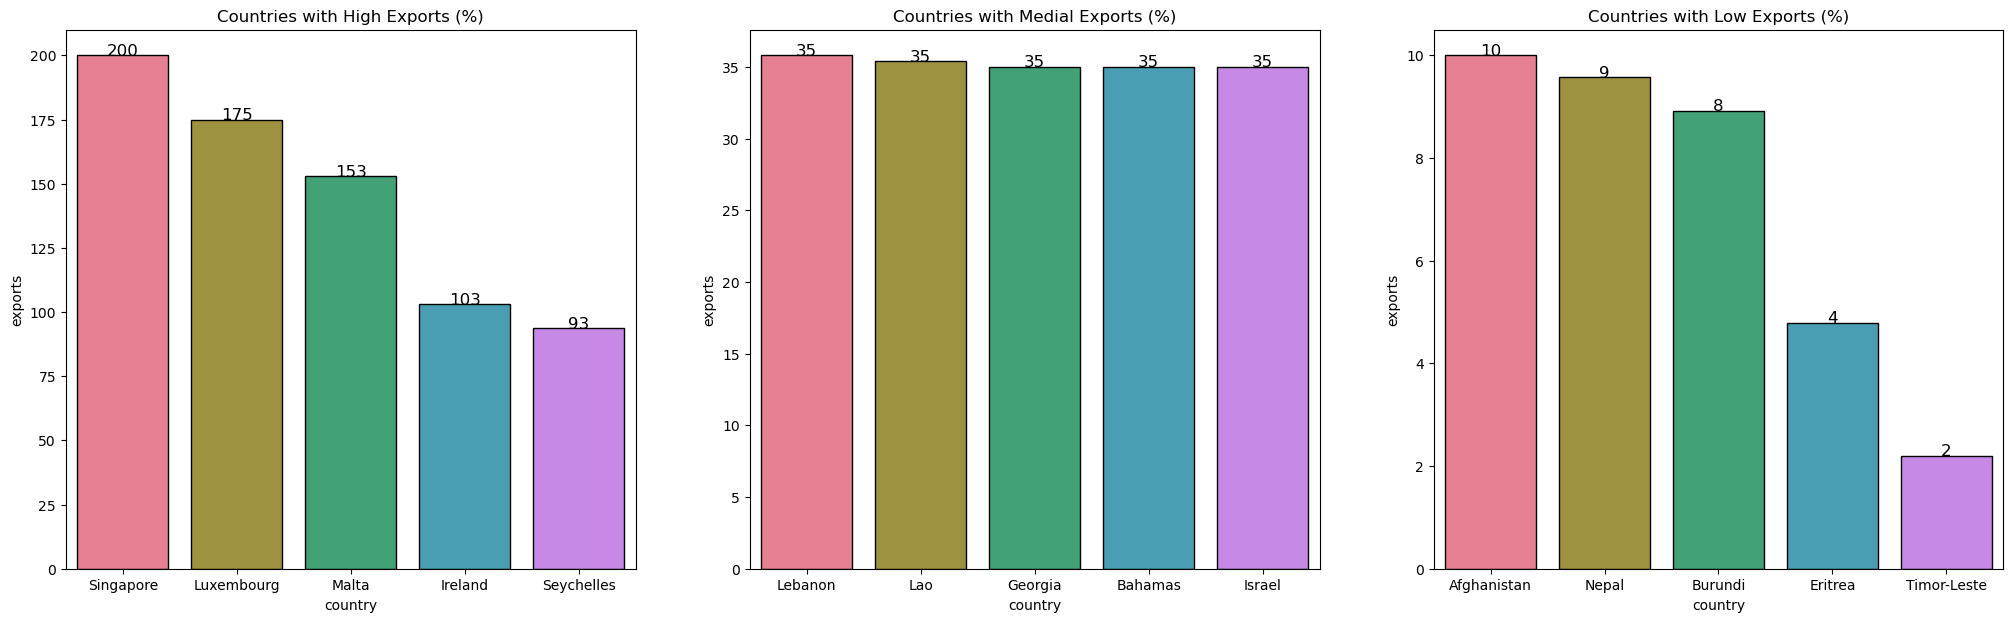

In [23]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'exports', data = df.sort_values(ascending = False,by = 'exports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'exports', data = df.sort_values(ascending = False,by = 'exports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'exports', data = df.sort_values(ascending = False,by = 'exports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Exports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

### health : Citizens of the developed nations have higher income and thus they don't have a problem on spending more on healthy lifestyle!

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2796535152.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2796535152.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2796535152.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




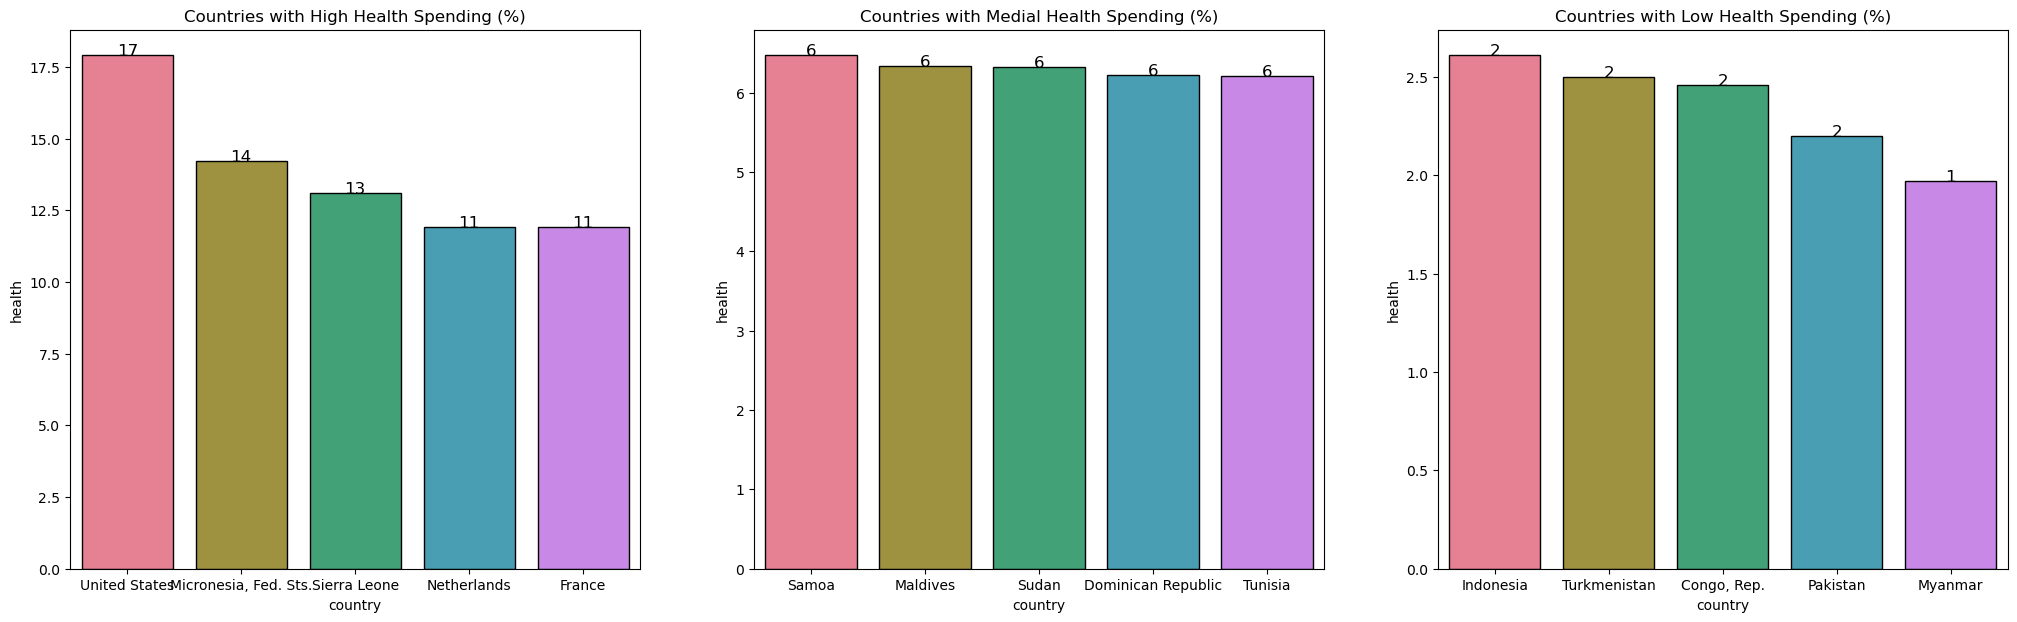

In [25]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'health', data = df.sort_values(ascending = False,by = 'health').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Health Spending (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

### imports : It is another attribute that determines the reliance of the nations on other nations for the goods and services!

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/1099074119.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/1099074119.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/1099074119.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




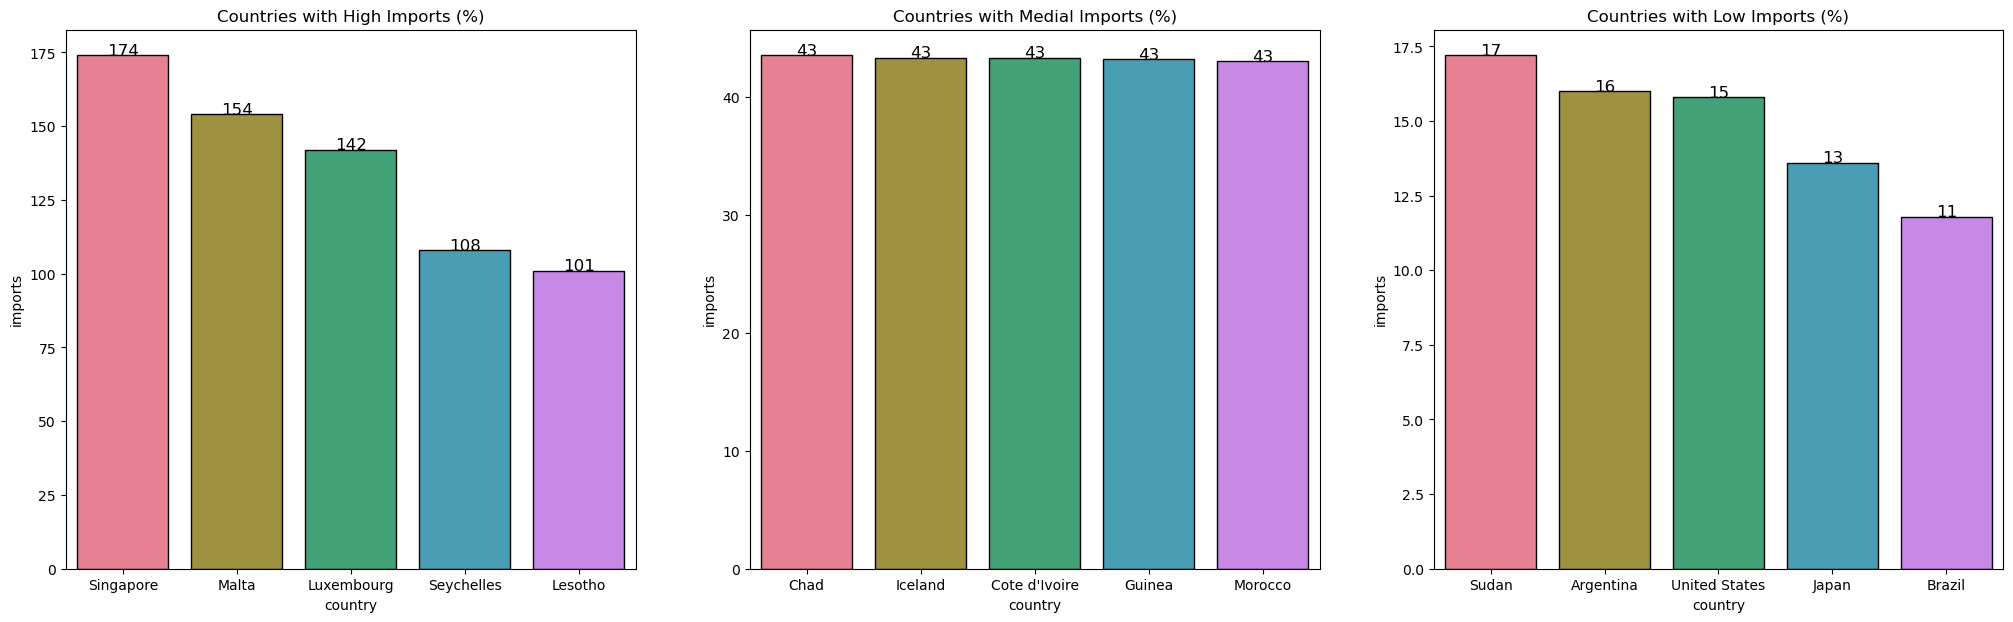

In [27]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'imports', data = df.sort_values(ascending = False,by = 'imports').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Imports (%)')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

### income : Income of the per person is a key indicator about country's economic state. Higher the income of the citizens, more capabale they are to deal with uncertain situations!

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2606120770.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2606120770.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2606120770.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




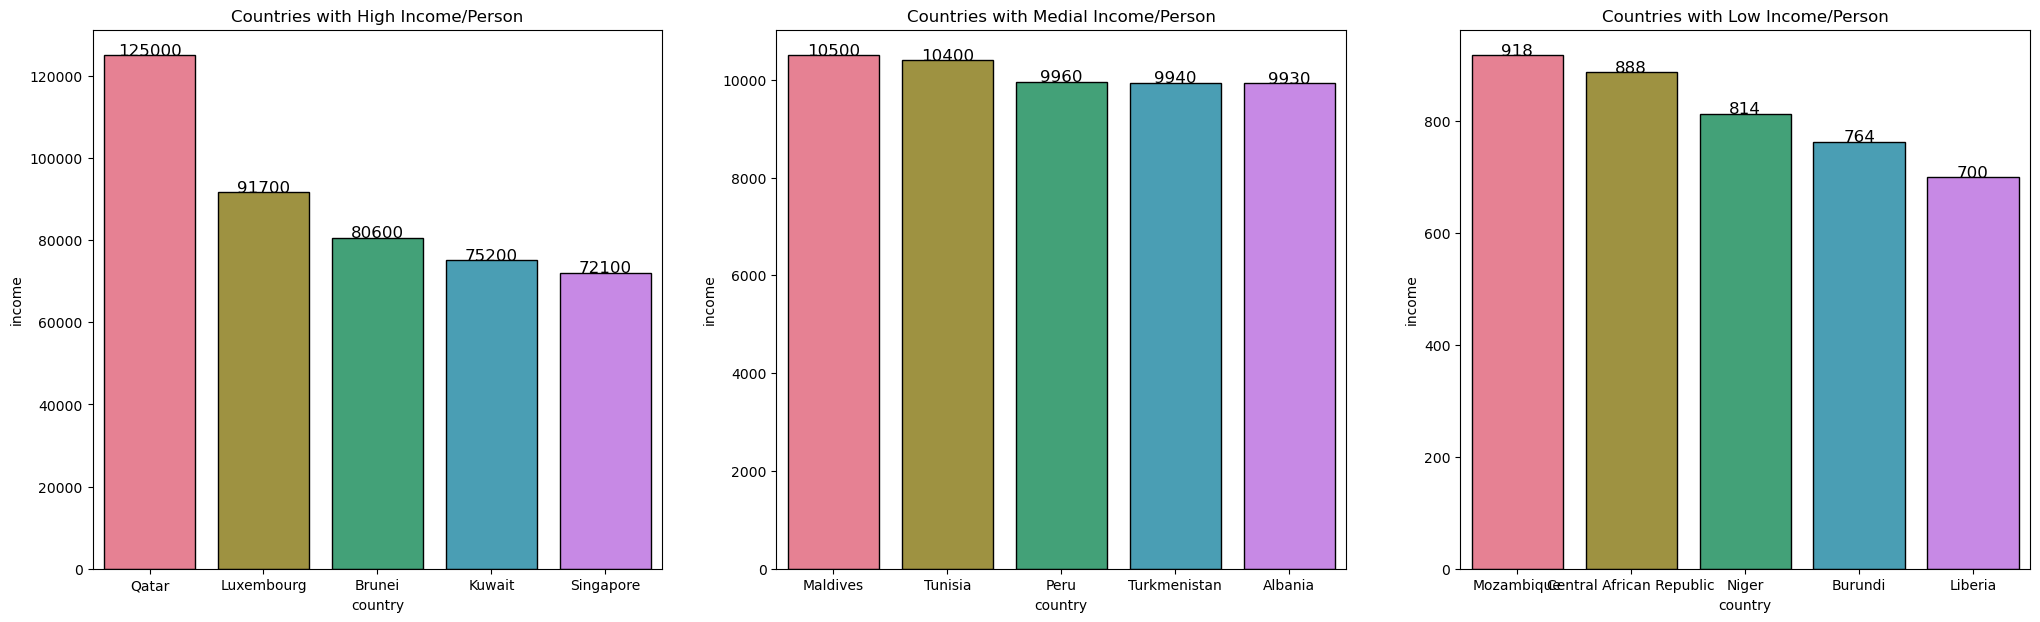

In [29]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'income', data = df.sort_values(ascending = False,by = 'income').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Income/Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

### inflation : It dictates the state of the economy, strength of the currency as well as demand for goods & services!

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2128223895.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2128223895.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2128223895.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




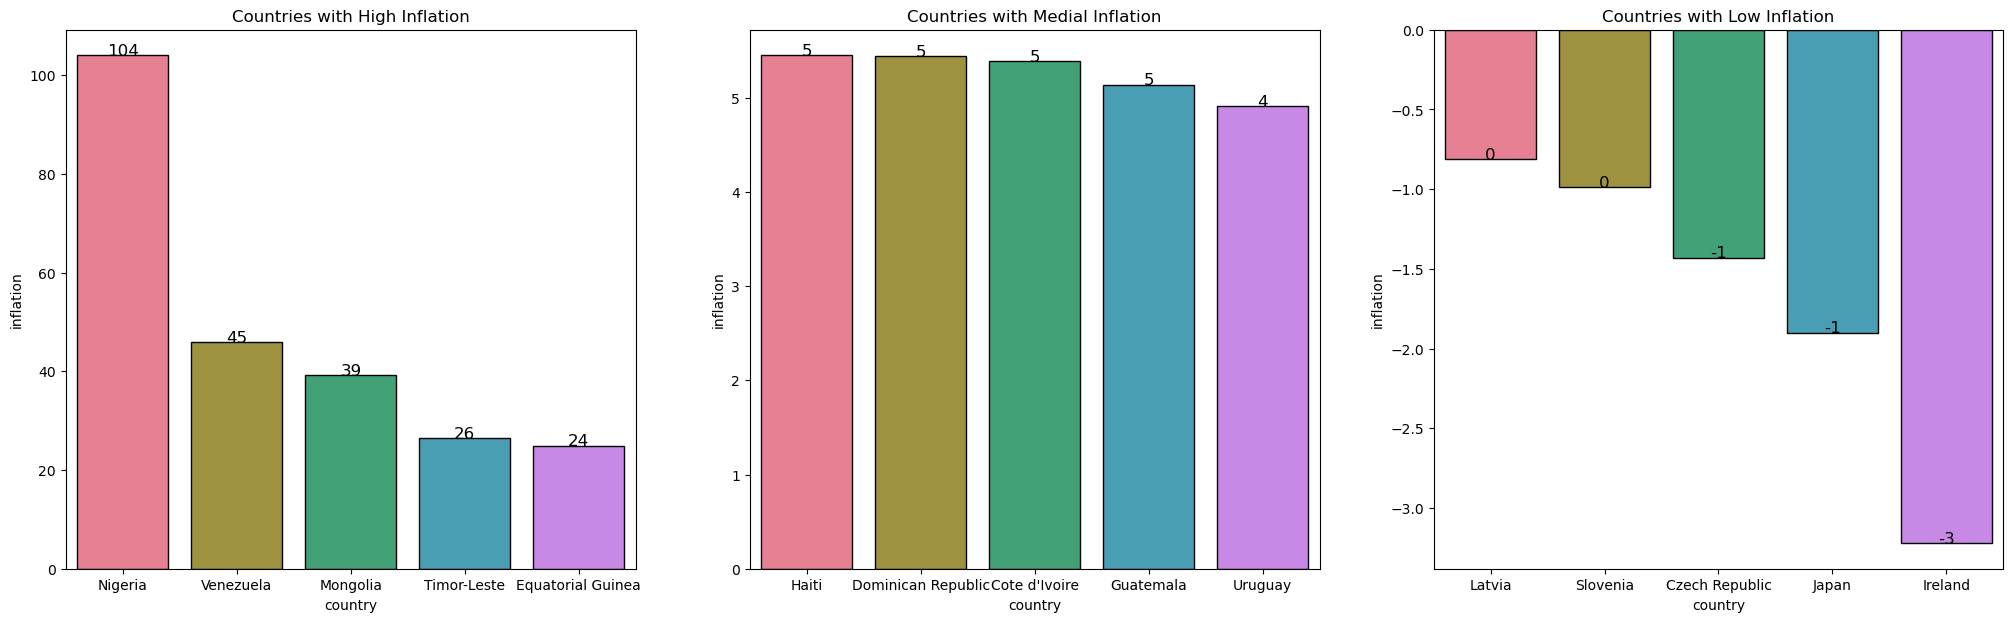

In [31]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'inflation', data = df.sort_values(ascending = False,by = 'inflation').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Inflation')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

### life_expec : Higher life expectancy displays citizens with health attributes physically as well as mentally!

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/3157024349.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/3157024349.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/3157024349.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




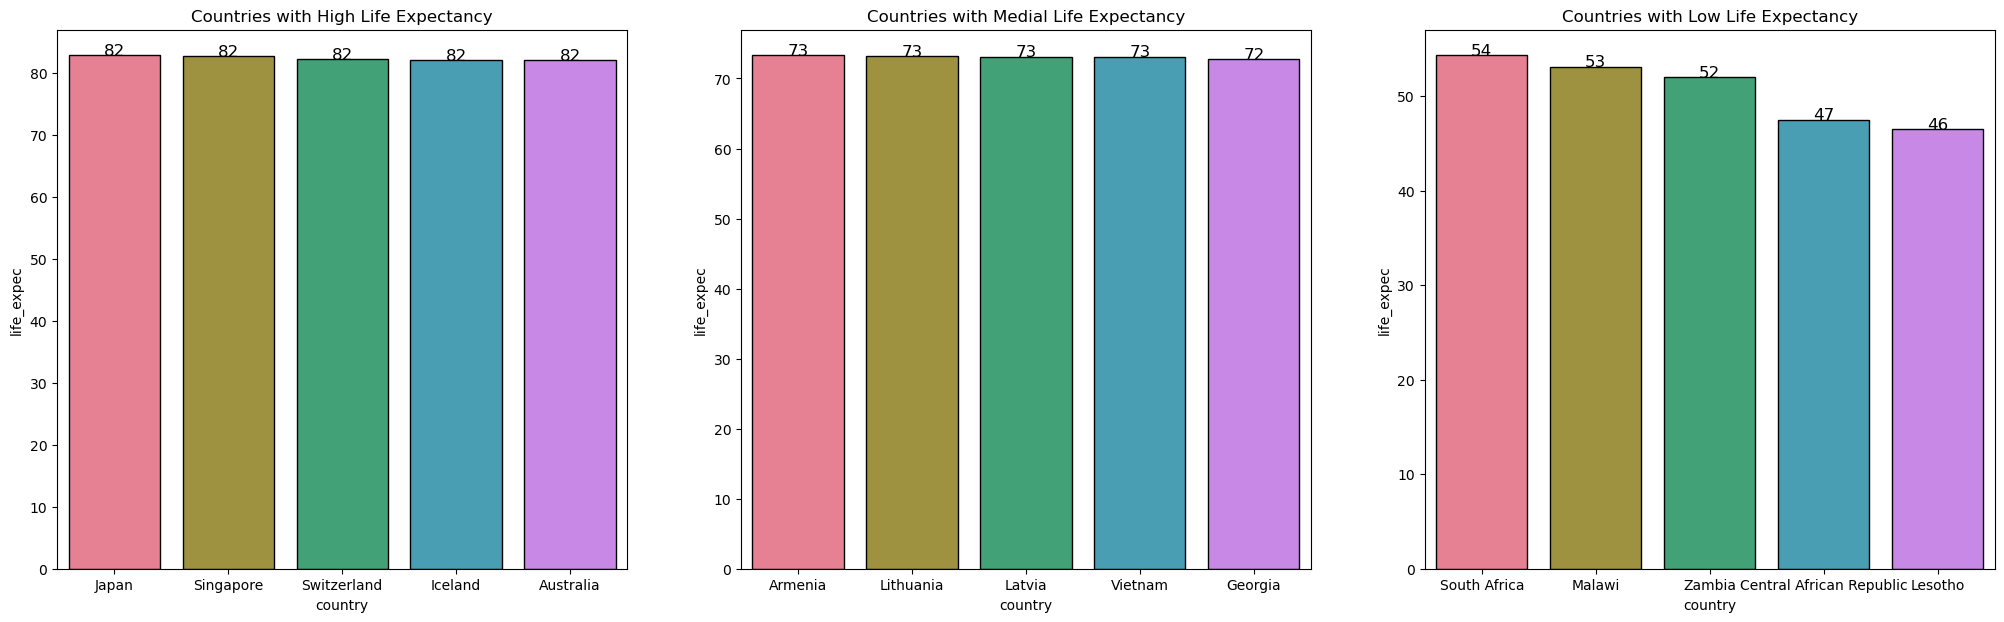

In [33]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'life_expec', data = df.sort_values(ascending = False,by = 'life_expec').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'life_expec', data = df.sort_values(ascending = False,by = 'life_expec').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'life_expec', data = df.sort_values(ascending = False,by = 'life_expec').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Life Expectancy')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

### total_fer : Economically backward countries have a high fertility rate!

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/4062419418.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/4062419418.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/4062419418.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




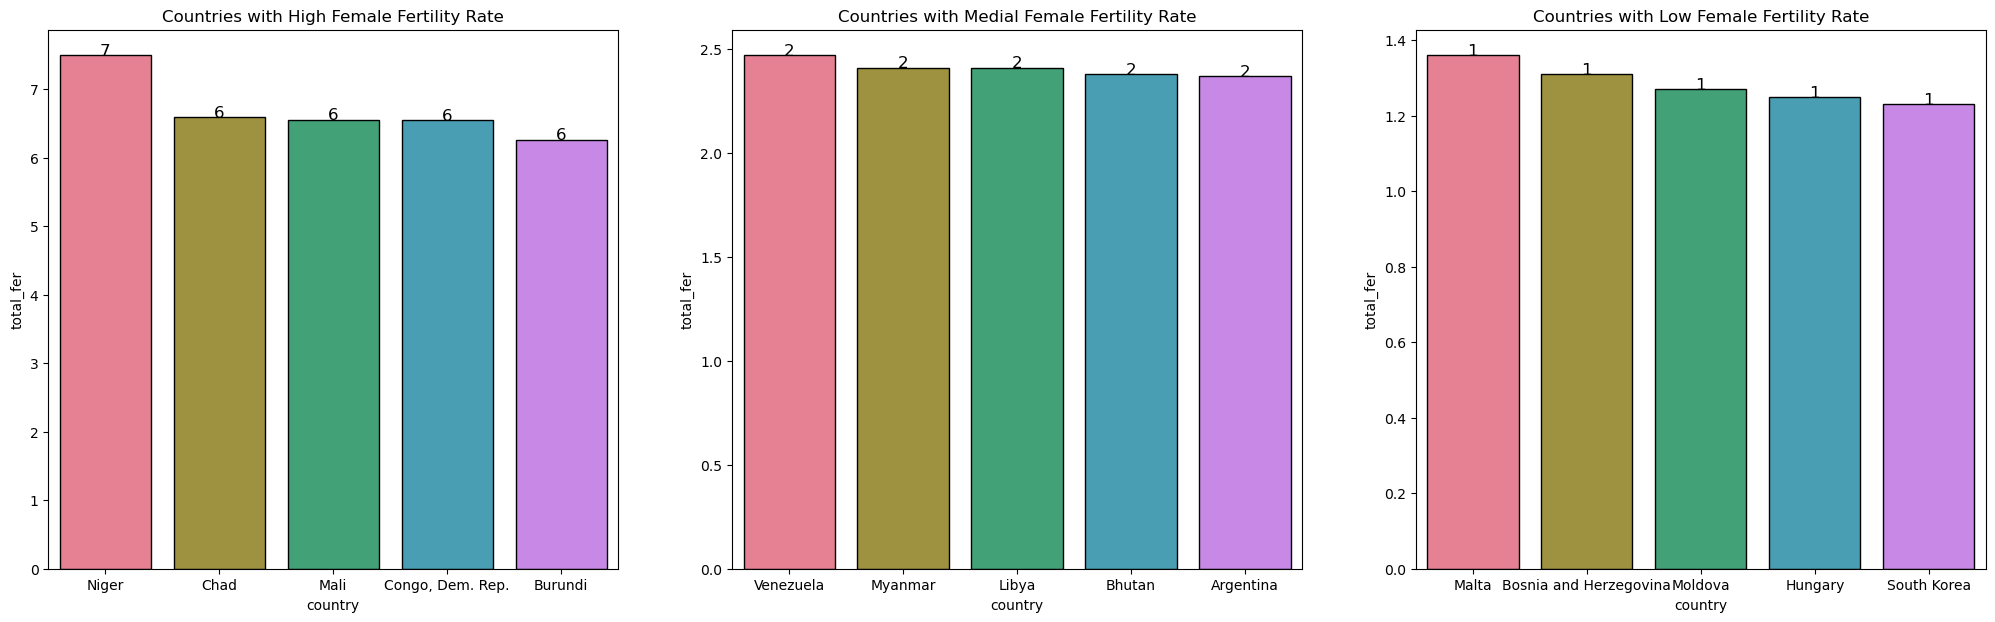

In [35]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'total_fer', data = df.sort_values(ascending = False,by = 'total_fer').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low Female Fertility Rate')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

### gdpp : It is a feature that provides information about the contribution of a citizen to it's GDP!

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/3433880566.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/3433880566.py:10: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/3433880566.py:17: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




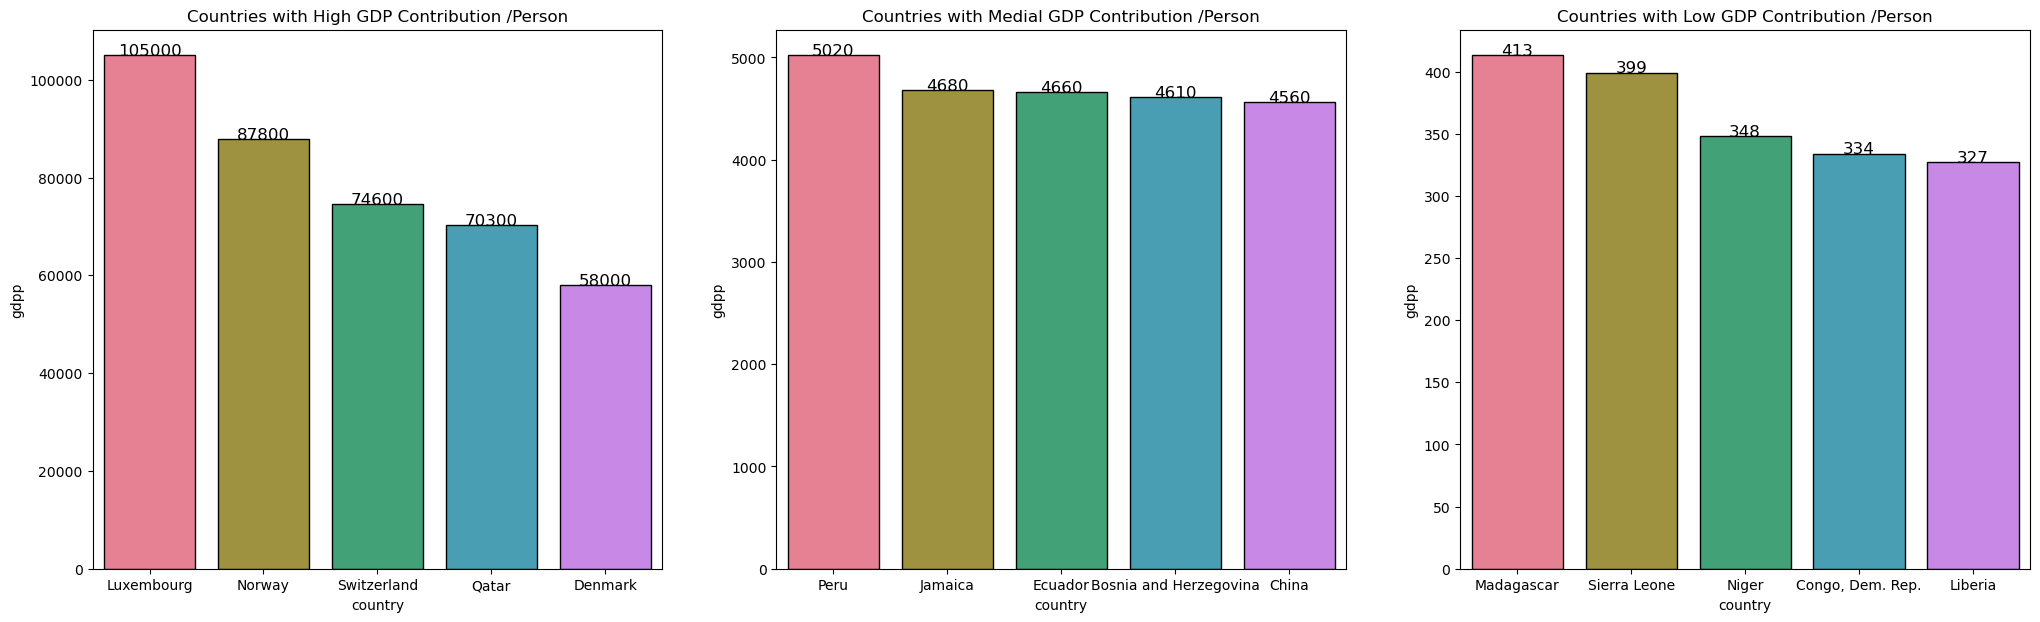

In [37]:
fig = plt.subplots(nrows = 1,ncols = 3,figsize = (25,7))
plt.subplot(1,3,1)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[:5],palette = colors,edgecolor = 'black');
plt.title('Countries with High GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,2)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[81:86],palette = colors,edgecolor = 'black');
plt.title('Countries with Medial GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)

plt.subplot(1,3,3)
ax = sns.barplot(x = 'country',y = 'gdpp', data = df.sort_values(ascending = False,by = 'gdpp').iloc[161:166],palette = colors,edgecolor = 'black');
plt.title('Countries with Low GDP Contribution /Person')
for rect in ax.patches:
    ax.text(rect.get_x() + rect.get_width()/2, rect.get_height(), int(rect.get_height()), 
            horizontalalignment='center', fontsize = 12)
plt.show()

In [38]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

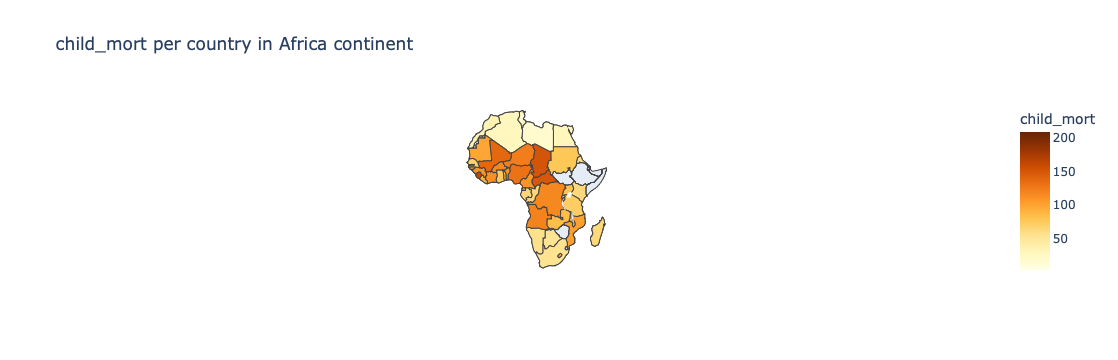

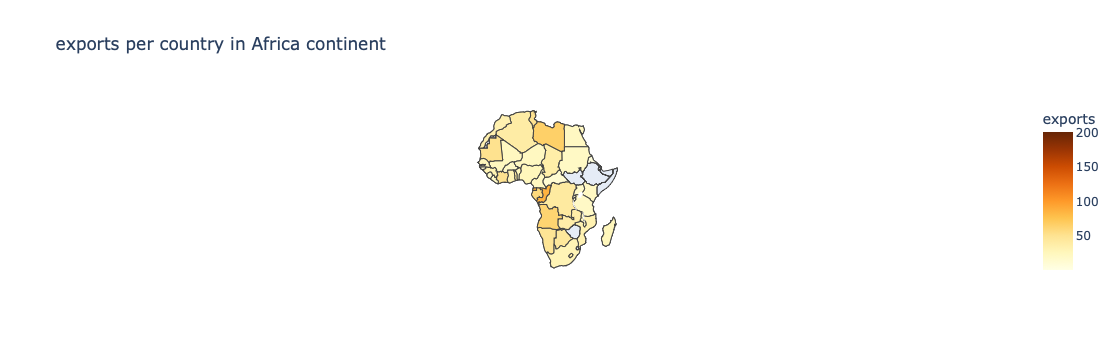

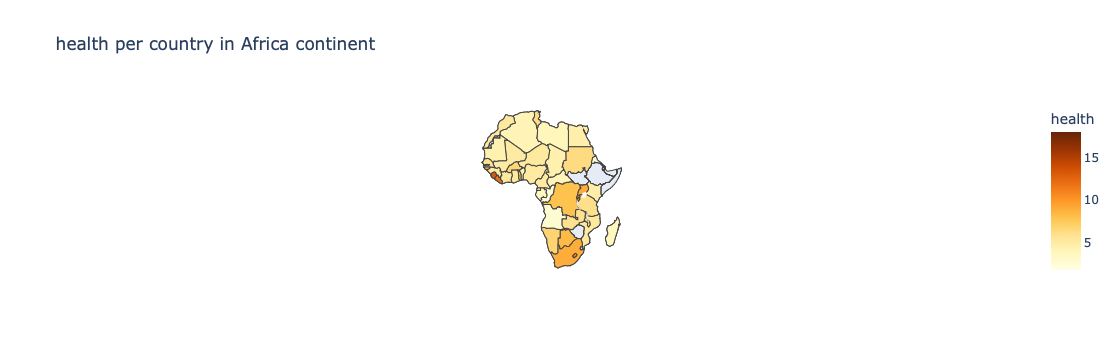

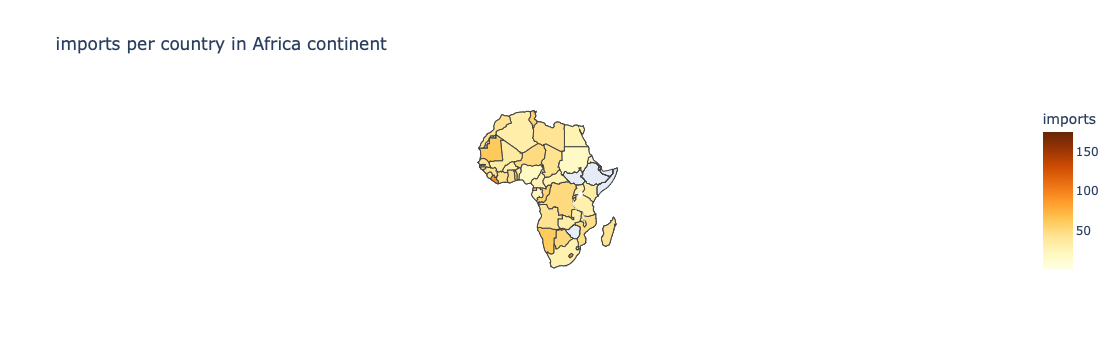

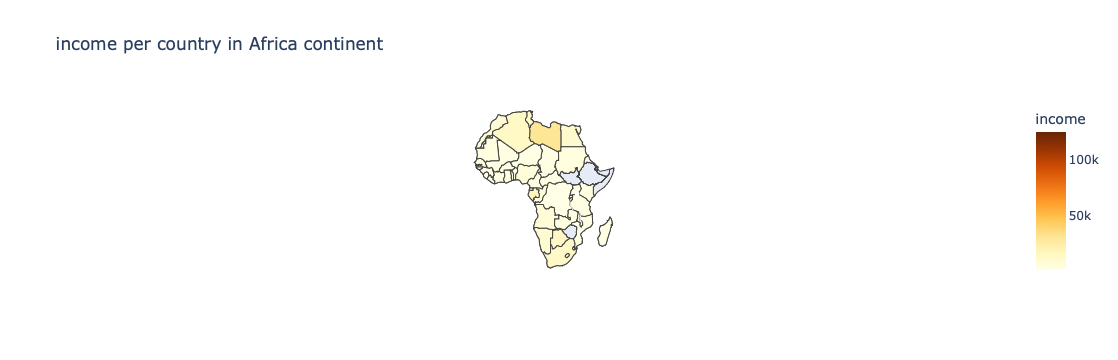

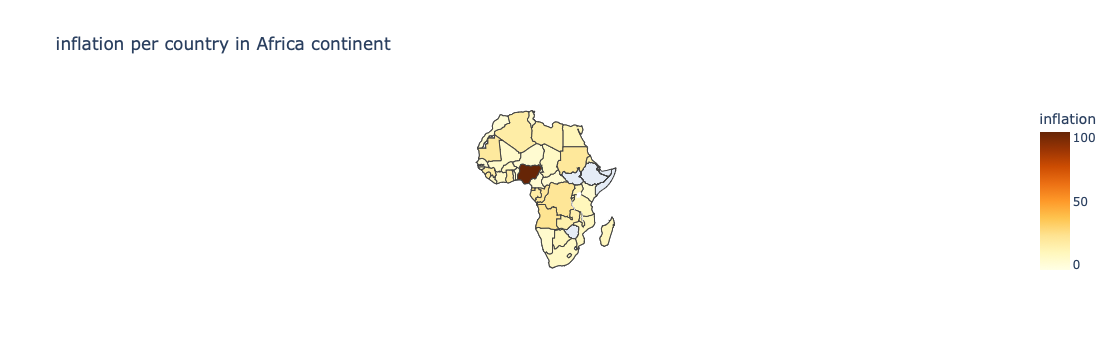

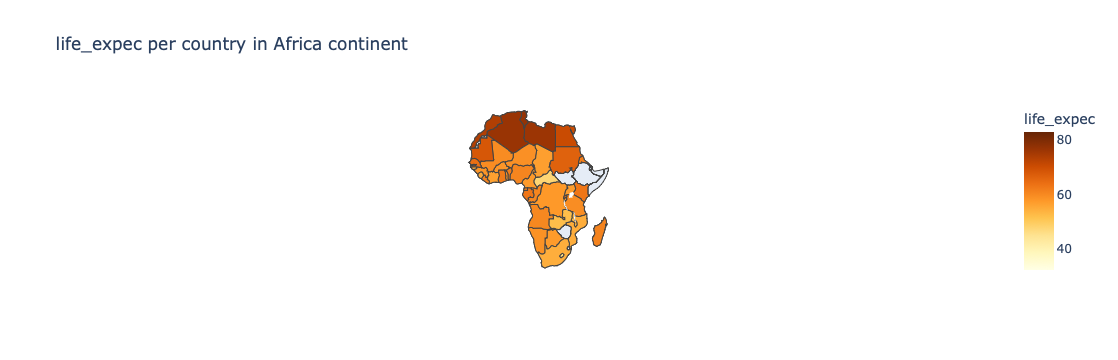

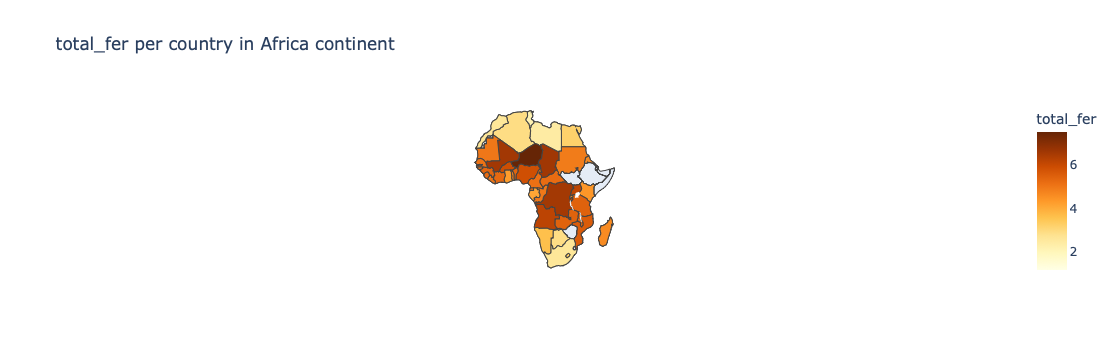

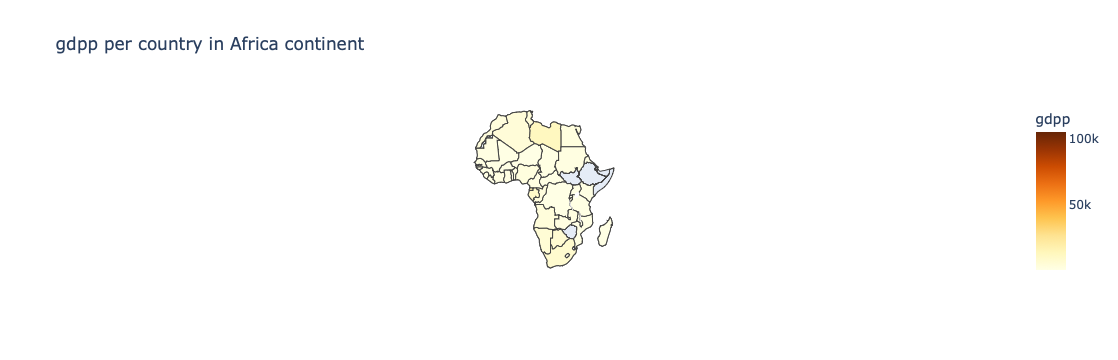

In [39]:
#focus on Africa
for i in df.drop('country', axis=1).columns:
    fig = px.choropleth(df, locationmode='country names', locations='country',
                        color=i, title=i+' per country in Africa continent',scope='africa',color_continuous_scale="YlOrBr")
    fig.update_geos(fitbounds="locations", visible=True)
    fig.show(engine='kaleido')

#summary of EDA 
From the visualizations and the list of features of an economically backward nations, a host of insights can be gained!

When it comes to health conditions, African countries hold higher ranks in all the wrong situations. They hold a significant presence in high child_mort, low life_expec and high total_fer.

All these problems are already pretty serious and hence it is very important to assist them during the periods of unforseen turmoils. 

Despite such numbers, Haiti grabs the top spot with high values of child_mort. Asian & European countries are present at the other end of it.

US citizens are the highest spenders on their health however they are not present in the top 5 ranks of life_expec & total_fer. None of the countries with a high life_expec are present in the top 5 of health. Asian countries crowd lower end of health.

Singapore, Malta, Luxembourg & Seychelles are present in the top 5 of exports as well as imports. Population size and geographical locations play a pivotal role when it comes to imports and exports.

Sudan is the only African nation with low imports and Brazil has the lowest imports out of all.

African countries display very high values of inflation whereas countries from all the continents can be found with low inflation values.

Citizens of the Qatar are the highest paid with Singapore & Luxembourg again grabbing spots in top 5 of income.

For gdpp, Luxembourg is in the top ranks. Switzerland & Qatar are present in the top 5 similar to income.

African nations are present in the lower end of income as well as gdpp. Colonization has had a huge toll on the African nations.

# model fitting

## feature scaling

### normality testing

In [44]:
df1=df.drop(columns='country')
df1.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

### normalisation and standardisation

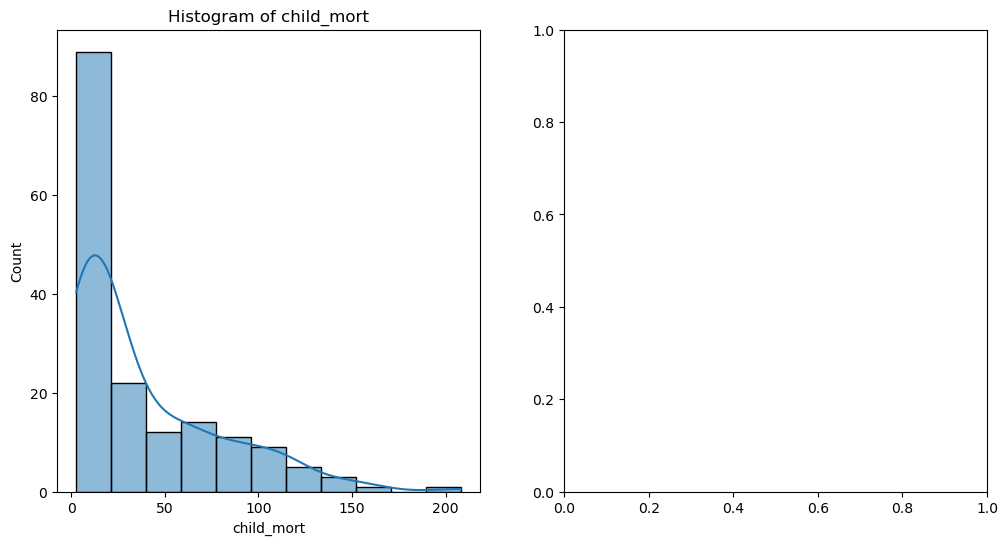

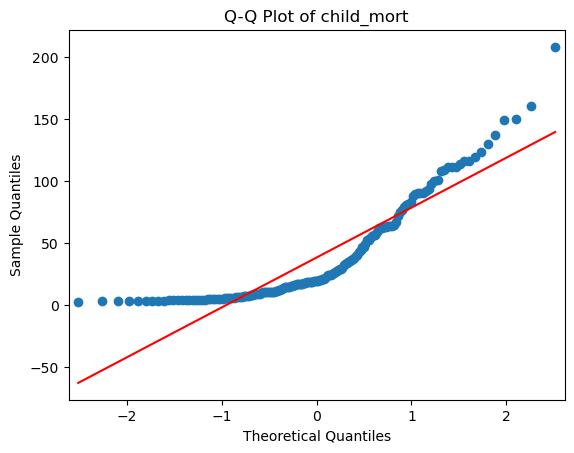

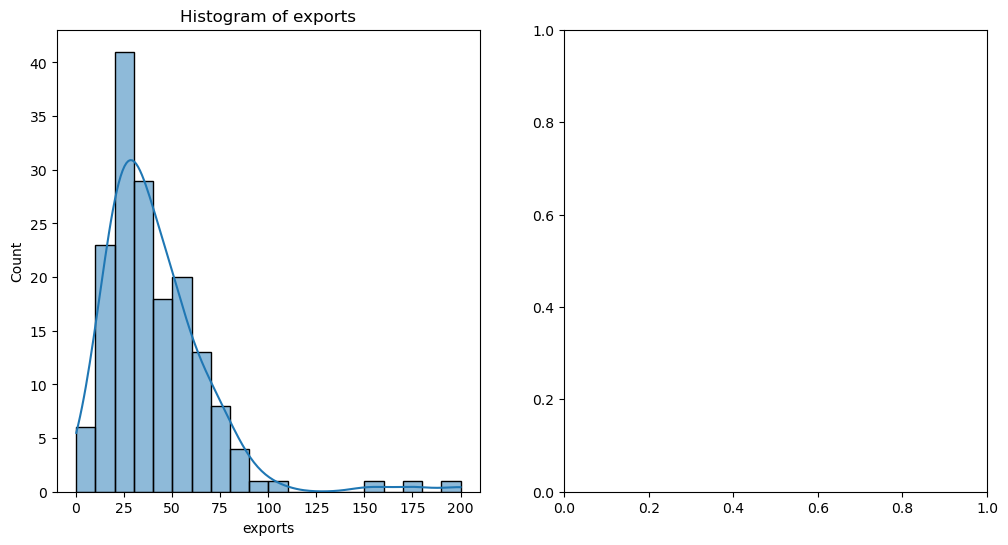

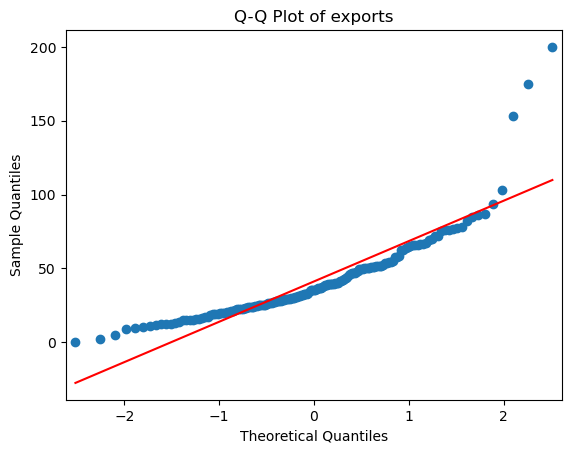

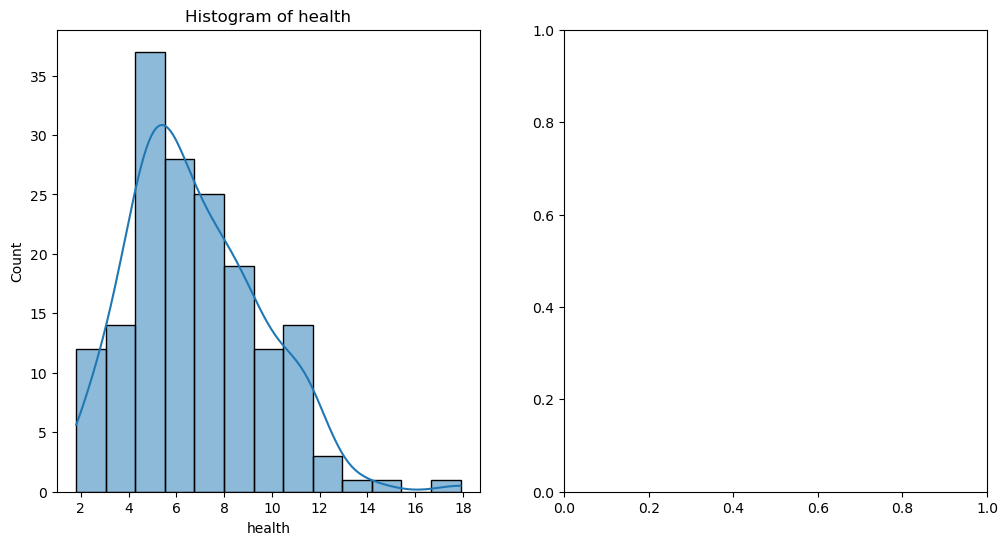

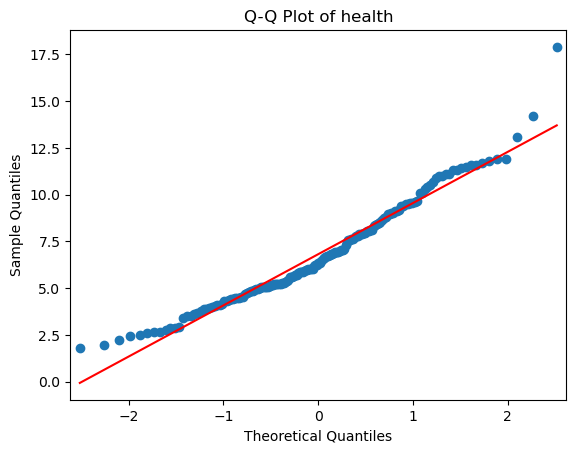

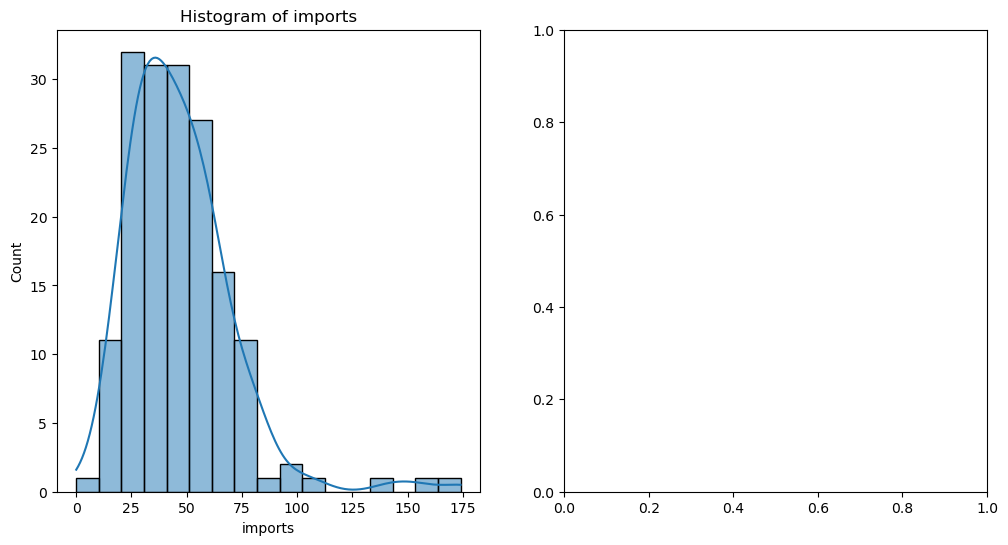

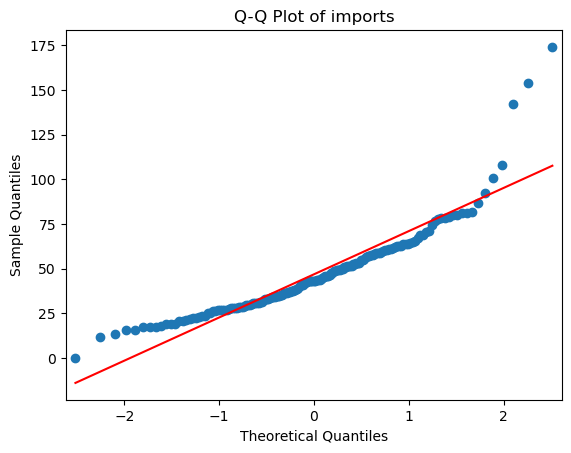

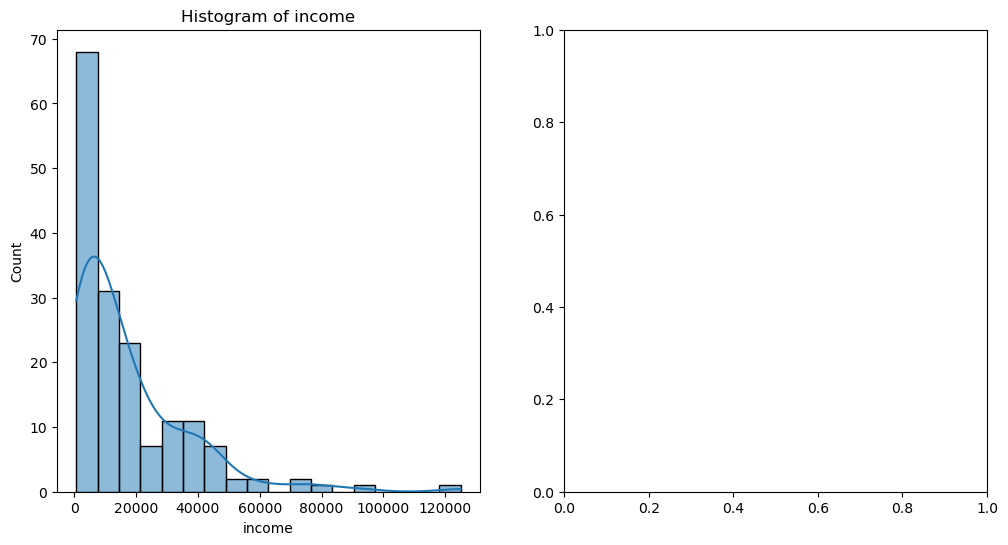

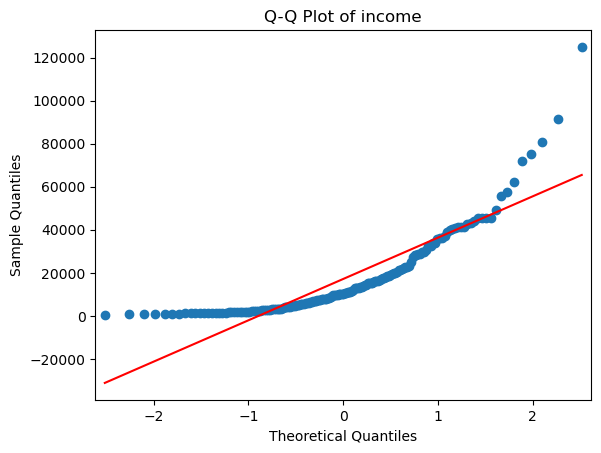

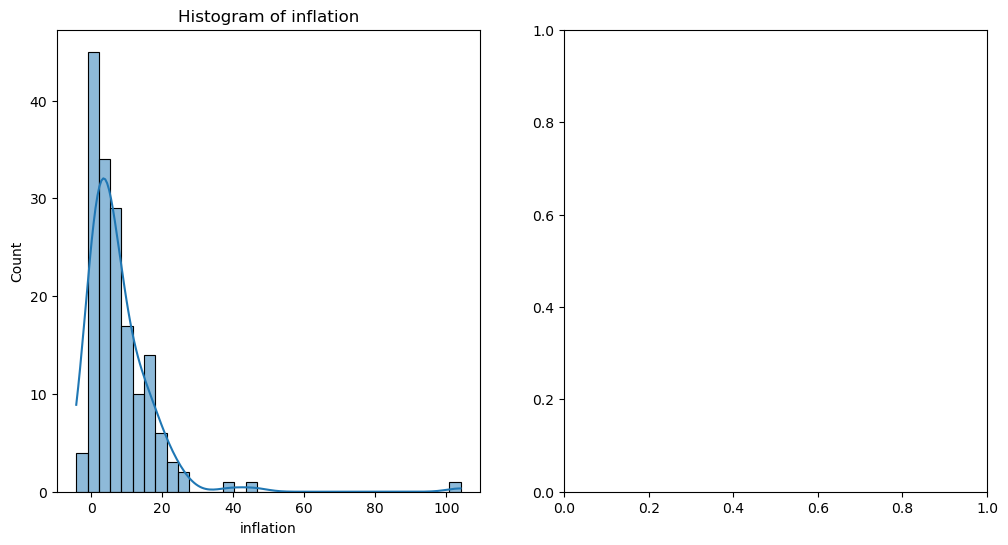

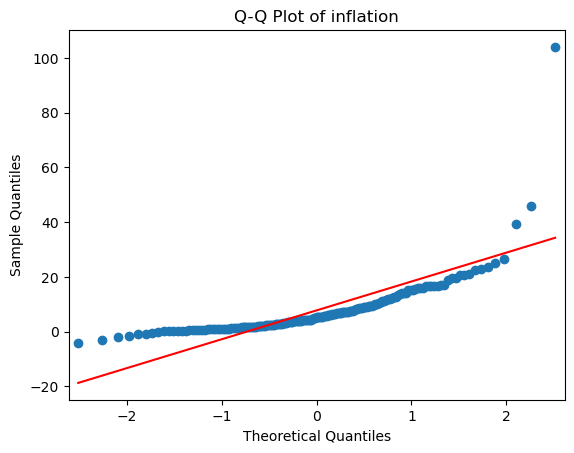

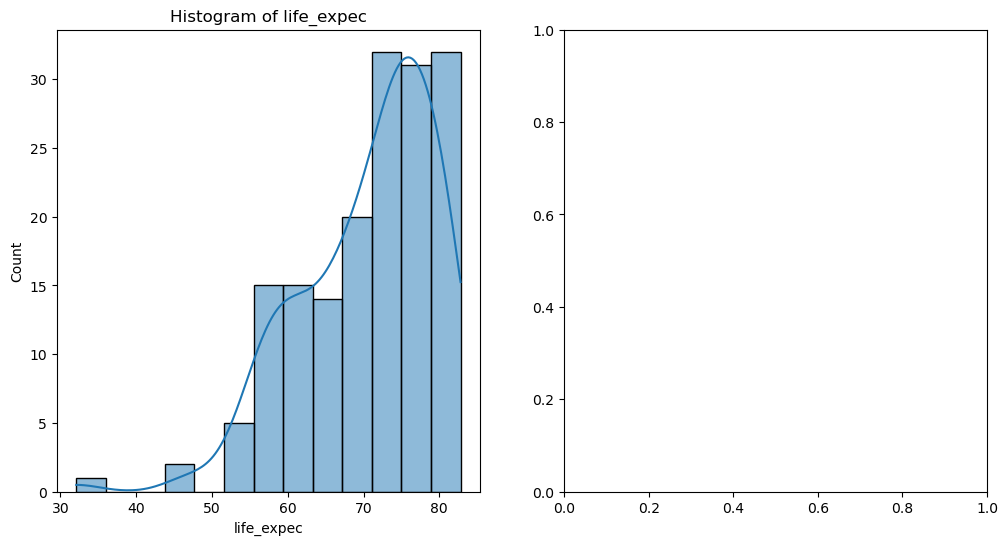

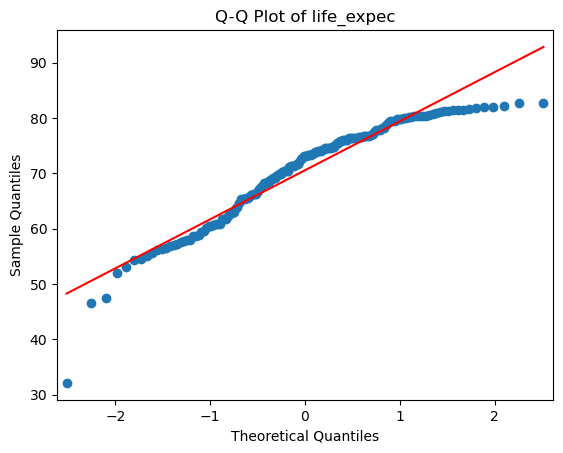

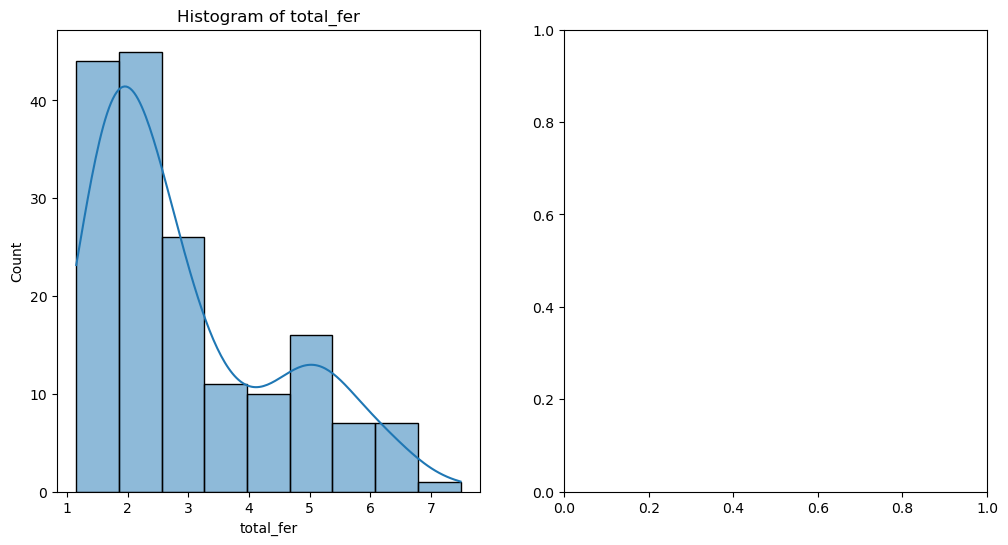

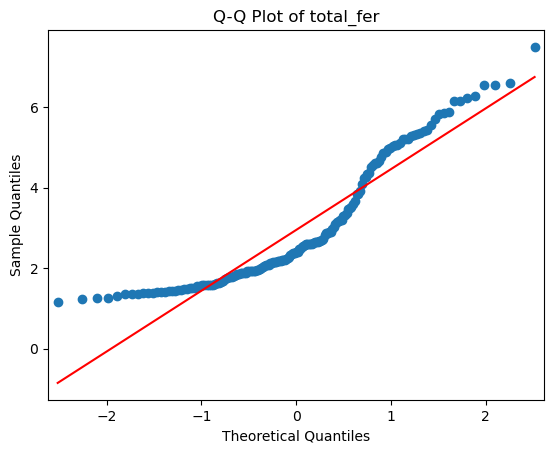

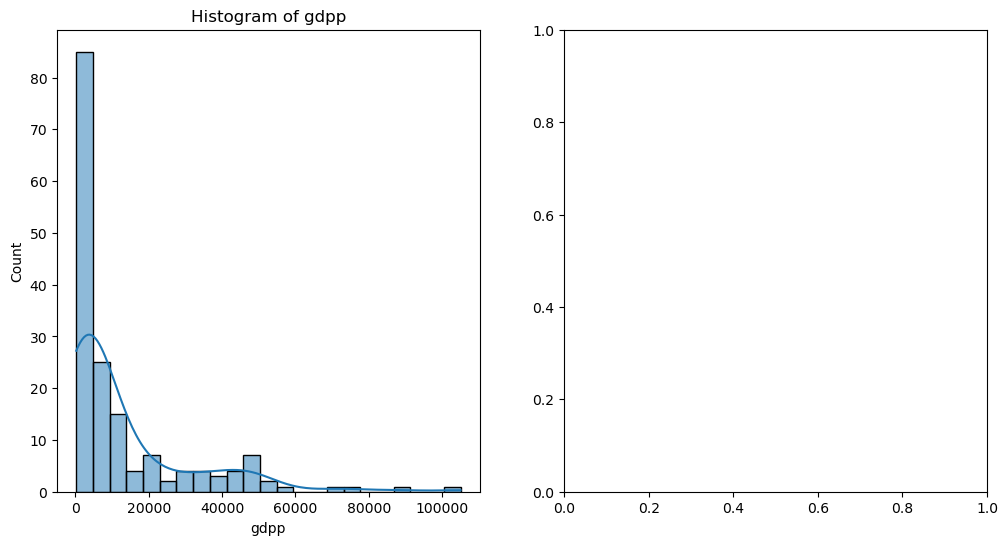

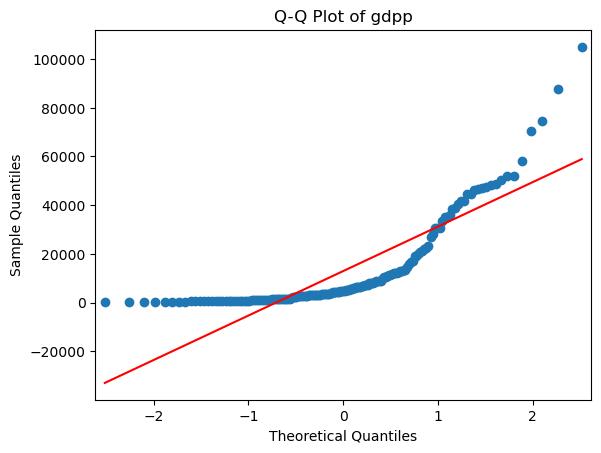

            Shapiro-Wilk Test Statistic       p-value
child_mort                     0.811947  2.165134e-13
exports                        0.813753  2.546082e-13
health                         0.964136  2.628207e-04
imports                        0.868810  6.639577e-11
income                         0.771261  7.280748e-15
inflation                      0.616314  3.640728e-19
life_expec                     0.926400  1.643109e-07
total_fer                      0.872212  9.826097e-11
gdpp                           0.696474  3.834858e-17
child_mort does not look normally distributed (reject H0)
exports does not look normally distributed (reject H0)
health does not look normally distributed (reject H0)
imports does not look normally distributed (reject H0)
income does not look normally distributed (reject H0)
inflation does not look normally distributed (reject H0)
life_expec does not look normally distributed (reject H0)
total_fer does not look normally distributed (reject H0)
gdpp does no

In [46]:

import seaborn as sns
from scipy.stats import shapiro, normaltest, anderson
import statsmodels.api as sm

# Function to plot histograms and Q-Q plots
def plot_distributions(data):
    for column in data.columns:
        plt.figure(figsize=(12, 6))
        
        # Histogram
        plt.subplot(1, 2, 1)
        sns.histplot(data[column], kde=True)
        plt.title(f'Histogram of {column}')
        
        # Q-Q plot
        plt.subplot(1, 2, 2)
        sm.qqplot(data[column], line='s')
        plt.title(f'Q-Q Plot of {column}')
        
        plt.show()

# Function to perform Shapiro-Wilk test
def test_normality(data):
    results = {}
    for column in data.columns:
        stat, p_value = shapiro(data[column])
        results[column] = {'Shapiro-Wilk Test Statistic': stat, 'p-value': p_value}
    return pd.DataFrame(results).T

# Plot histograms and Q-Q plots
plot_distributions(df1)

# Perform Shapiro-Wilk test
normality_results = test_normality(df1)
print(normality_results)

# Interpreting the Shapiro-Wilk test results
alpha = 0.05
for column in normality_results.index:
    p_value = normality_results.loc[column, 'p-value']
    if p_value > alpha:
        print(f'{column} looks normally distributed (fail to reject H0)')
    else:
        print(f'{column} does not look normally distributed (reject H0)')


In [47]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler     #we will use df2 for making pca data
mms = MinMaxScaler() # Normalization
ss = StandardScaler() # Standardization
df2=mms.fit_transform(df1)
df2 = pd.DataFrame(df2, columns=df1.columns)
df2.head()


child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833  
2   0.274448  0.040365  
3   0.790221  0.031488  
4   0.154574  0.114242

In [48]:
df1.head()

child_mort  exports  health  imports  income  inflation  life_expec  \
0        90.2     10.0    7.58     44.9    1610       9.44        56.2   
1        16.6     28.0    6.55     48.6    9930       4.49        76.3   
2        27.3     38.4    4.17     31.4   12900      16.10        76.5   
3       119.0     62.3    2.85     42.9    5900      22.40        60.1   
4        10.3     45.5    6.03     58.9   19100       1.44        76.8   

   total_fer   gdpp  
0       5.82    553  
1       1.65   4090  
2       2.89   4460  
3       6.16   3530  
4       2.13  12200

In [49]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200

### making datas for models --- one is combined data (by checking multicollinearity) and other is PCA data

### combined data

In [52]:
df_combi= pd.DataFrame()

df_combi['Fertility'] = (df1['child_mort'] / df1['child_mort'].mean())  +(df1['life_expec'] / df1['life_expec'].mean()) + (df1['total_fer'] / df1['total_fer'].mean())+(df1['health'] / df1['health'].mean())

df_combi['Trade'] = (df1['imports'] / df1['imports'].mean()) + (df1['exports'] / df1['exports'].mean())

df_combi['Finance'] = (df1['income'] / df1['income'].mean())  + (df1['gdpp'] / df1['gdpp'].mean()) + (df1['inflation'] / df1['inflation'].mean())

df_combi.head()

Fertility     Trade   Finance
0   6.239852  1.200812  1.349645
1   3.035901  1.717580  1.471658
2   3.389763  1.603752  3.165367
3   6.469020  2.430387  3.494919
4   2.964898  2.362940  2.240150

In [53]:
df_combined=mms.fit_transform(df_combi)
df_combined=pd.DataFrame(df_combined,columns=df_combi.columns)
df_combined.head()

Fertility     Trade   Finance
0   0.625740  0.139614  0.079820
1   0.127451  0.199901  0.088756
2   0.182485  0.186622  0.212808
3   0.661381  0.283058  0.236946
4   0.116409  0.275189  0.145043

In [54]:
df_combined.insert(loc = 0, value = list(df['country']), column = 'country')

In [55]:
df_combined.head()      #this is the final data (without using PCA)

country  Fertility     Trade   Finance
0          Afghanistan   0.625740  0.139614  0.079820
1              Albania   0.127451  0.199901  0.088756
2              Algeria   0.182485  0.186622  0.212808
3               Angola   0.661381  0.283058  0.236946
4  Antigua and Barbuda   0.116409  0.275189  0.145043

### pca data

In [57]:
df2.head()

child_mort   exports    health   imports    income  inflation  life_expec  \
0    0.426485  0.049482  0.358608  0.257765  0.008047   0.126144    0.475345   
1    0.068160  0.139531  0.294593  0.279037  0.074933   0.080399    0.871795   
2    0.120253  0.191559  0.146675  0.180149  0.098809   0.187691    0.875740   
3    0.566699  0.311125  0.064636  0.246266  0.042535   0.245911    0.552268   
4    0.037488  0.227079  0.262275  0.338255  0.148652   0.052213    0.881657   

   total_fer      gdpp  
0   0.736593  0.003073  
1   0.078864  0.036833  
2   0.274448  0.040365  
3   0.790221  0.031488  
4   0.154574  0.114242

In [58]:
from sklearn.decomposition import PCA

pca = PCA()
pca_df2 = pd.DataFrame(pca.fit_transform(df2))
pca.explained_variance_

array([0.14180615, 0.03450913, 0.03171502, 0.02513534, 0.00974048,
       0.00776992, 0.00306922, 0.00228894, 0.00178941])

In [59]:
pca_df2.head()

0         1         2         3         4         5         6  \
0 -0.599078  0.095490  0.157554 -0.024333 -0.045618 -0.046532  0.076803   
1  0.158474 -0.212092 -0.064189 -0.061247  0.014191 -0.010246 -0.043567   
2  0.003686 -0.135867 -0.134182  0.133574 -0.091150  0.025988 -0.045604   
3 -0.650235  0.275975 -0.142672  0.156018 -0.081997  0.032170 -0.073985   
4  0.200711 -0.064662 -0.100715 -0.037902 -0.035799 -0.055817 -0.009559   

          7         8  
0  0.040610  0.023572  
1  0.030842  0.029833  
2 -0.010198  0.003012  
3 -0.045195 -0.042241  
4  0.026228  0.022455

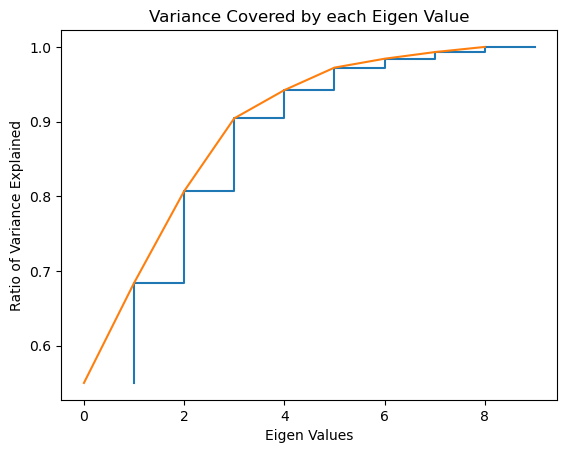

In [60]:
plt.step(list(range(1,10)), np.cumsum(pca.explained_variance_ratio_))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Eigen Values')
plt.ylabel('Ratio of Variance Explained')
plt.title('Variance Covered by each Eigen Value')
plt.show()

In [61]:
from sklearn.decomposition import KernelPCA
kpca = KernelPCA(n_components = 5, kernel = 'rbf')

df_pca= pd.DataFrame(kpca.fit_transform(df2))
df_pca.head()

0         1         2         3         4
0  0.273086  0.063546 -0.056393 -0.014086 -0.023107
1 -0.076278 -0.102108 -0.002327 -0.022744  0.010360
2 -0.003554 -0.080754  0.039843  0.064977 -0.038814
3  0.295560  0.098470  0.091555  0.065217 -0.037463
4 -0.093909 -0.047295  0.035278 -0.016528 -0.017999

In [62]:
df_pca.insert(loc = 0, value = list(df['country']), column = 'country')

In [63]:
df_pca.head()      #this is the data for modeling with using pca

country         0         1         2         3         4
0          Afghanistan  0.273086  0.063546 -0.056393 -0.014086 -0.023107
1              Albania -0.076278 -0.102108 -0.002327 -0.022744  0.010360
2              Algeria -0.003554 -0.080754  0.039843  0.064977 -0.038814
3               Angola  0.295560  0.098470  0.091555  0.065217 -0.037463
4  Antigua and Barbuda -0.093909 -0.047295  0.035278 -0.016528 -0.017999

## k-means model

In [65]:
d1 = df_combined.drop(columns = ['country']).values 
d2 = df_pca.drop(columns = ['country']).values 

### using combined data

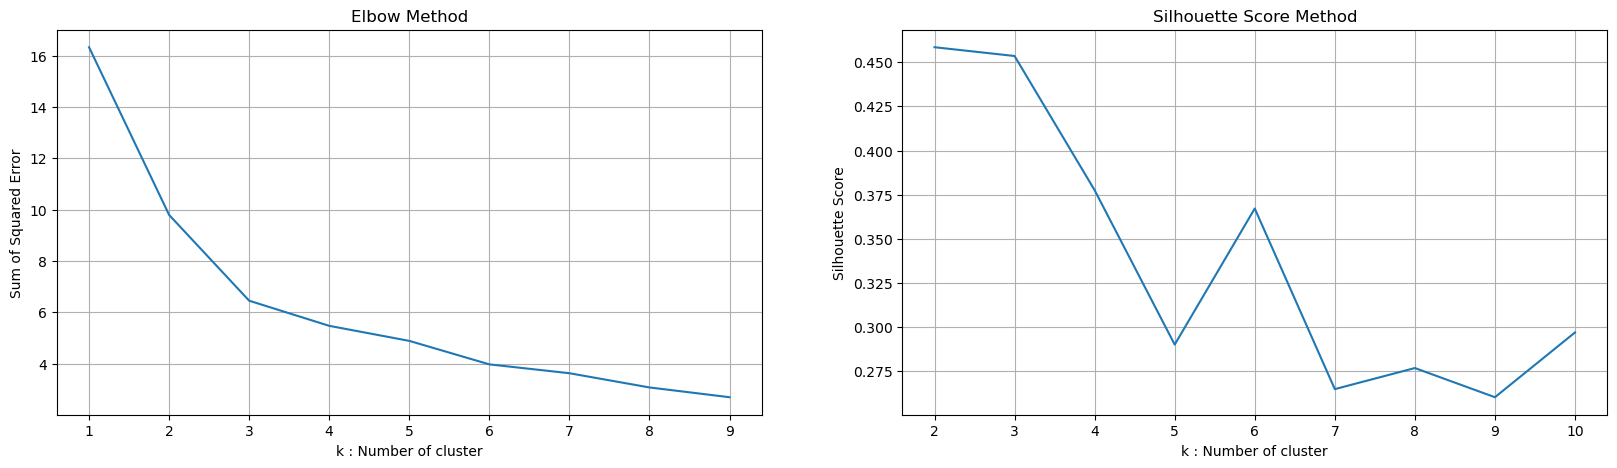

In [67]:
from sklearn.cluster import KMeans
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(d1)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(d1)
    labels = kmeans.labels_
    sil.append(silhouette_score(d1, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()


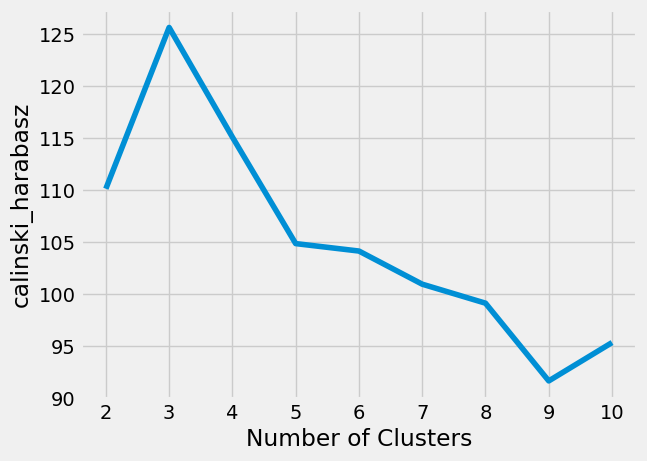

calinski_harabaz: 125.6162650170548


In [68]:
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(d1)
    metrics.calinski_harabasz_score(d1, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(d1, kmeans.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('calinski_harabaz:',max(calinski_harabaz))

In [69]:
model1 = KMeans(n_clusters = 3,init='k-means++', max_iter = 1000)
model1.fit(d1)

KMeans(max_iter=1000, n_clusters=3)

In [70]:
# Get the cluster labels
clusters = model1.labels_

# Print or view the clusters
print(clusters)
len(clusters)

[0 2 2 0 2 2 2 1 1 2 2 1 2 2 2 1 2 0 2 2 2 2 2 1 2 0 0 2 0 1 2 0 0 2 2 2 0
 0 2 2 0 2 2 2 1 2 2 2 2 0 2 2 2 1 1 2 0 2 1 0 2 2 2 0 0 2 0 2 1 2 2 2 2 1
 2 2 2 2 2 2 2 0 1 2 2 2 2 0 0 2 2 1 2 2 0 2 2 0 1 0 2 0 2 1 2 2 0 2 2 2 1
 2 0 1 1 1 0 2 2 2 2 2 2 1 2 2 0 2 1 0 2 2 0 1 2 2 2 2 2 2 2 2 0 2 1 1 2 0
 2 0 0 2 2 2 2 0 2 1 1 1 2 2 2 1 2 2 0]


167

Now we have got the clusters but we don't know which value corresponds to what!
Hence, we draw a boxplot of income & child_mort w.r.t labelled clusters!
We know that low income and high child mortality is a sign of an economically backward nation.

In [72]:
df_combined.head()

country  Fertility     Trade   Finance
0          Afghanistan   0.625740  0.139614  0.079820
1              Albania   0.127451  0.199901  0.088756
2              Algeria   0.182485  0.186622  0.212808
3               Angola   0.661381  0.283058  0.236946
4  Antigua and Barbuda   0.116409  0.275189  0.145043

In [73]:
cluster = model1.cluster_centers_
centroids = np.array(cluster)
labels = model1.labels_
df_combined['Class'] = labels

In [74]:
df_combined.head()

country  Fertility     Trade   Finance  Class
0          Afghanistan   0.625740  0.139614  0.079820      0
1              Albania   0.127451  0.199901  0.088756      2
2              Algeria   0.182485  0.186622  0.212808      2
3               Angola   0.661381  0.283058  0.236946      0
4  Antigua and Barbuda   0.116409  0.275189  0.145043      2

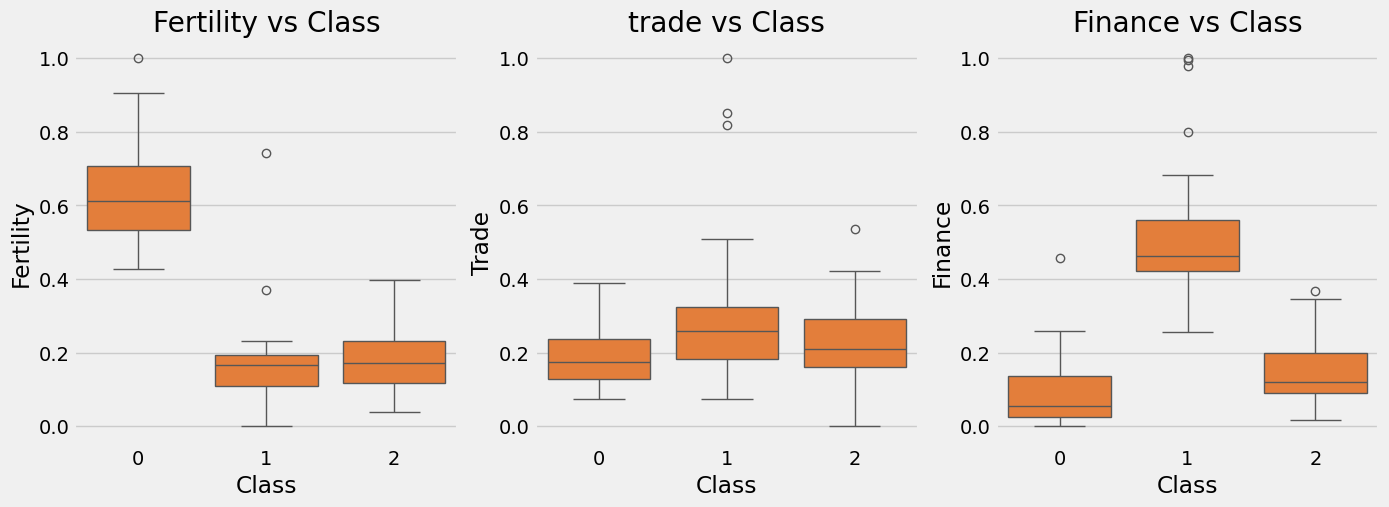

In [75]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Class', y = 'Fertility', data  = df_combined, color = '#FF781F');
plt.title('Fertility vs Class')

plt.subplot(1,3,2)
sns.boxplot(x = 'Class', y = 'Trade', data  = df_combined, color = '#FF781F');
plt.title('trade vs Class')

plt.subplot(1,3,3)
sns.boxplot(x = 'Class', y = 'Finance', data  = df_combined, color = '#FF781F');
plt.title('Finance vs Class')


plt.show()

In [76]:

from scipy import stats

# Group the data by Class
class_1_data = df_combined[df_combined['Class'] == 1]['Finance']
class_2_data = df_combined[df_combined['Class'] == 2]['Finance']

# For Class 1
mean_class_1 = class_1_data.mean()
median_class_1 = class_1_data.median()


print(f"Class 1 - Mean: {mean_class_1}, Median: {median_class_1}")

# For Class 2
mean_class_2 = class_2_data.mean()
median_class_2 = class_2_data.median()


print(f"Class 2 - Mean: {mean_class_2}, Median: {median_class_2}")


Class 1 - Mean: 0.5303812358120786, Median: 0.4619655289959299
Class 2 - Mean: 0.14627612128408465, Median: 0.12128301818379723


From the above plot we can conclude :
1 : No Help Needed
2 : Might Need Help 
0 : help Needed

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/101582032.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/101582032.py:1: SettingWithCopyWarning:


A value i

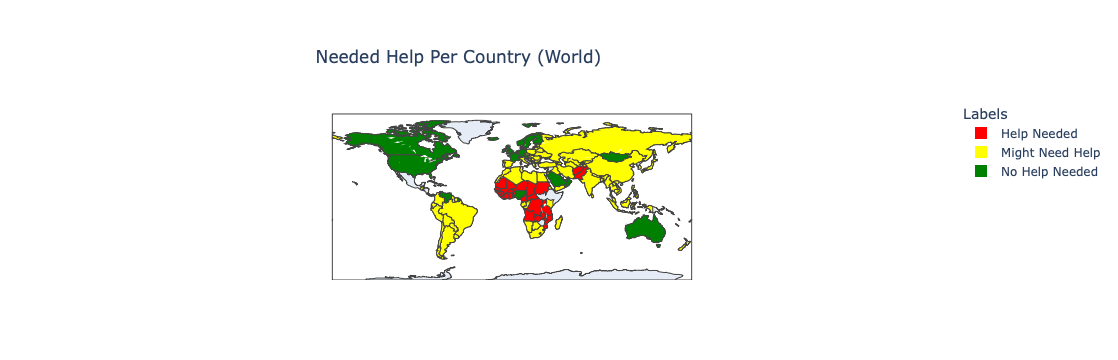

In [78]:
df_combined['Class'].loc[df_combined['Class'] == 1] = 'No Help Needed'
df_combined['Class'].loc[df_combined['Class'] == 2] = 'Might Need Help'
df_combined['Class'].loc[df_combined['Class'] == 0] = 'Help Needed'

fig = px.choropleth(df_combined[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df_combined['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [79]:
print(df_combined['Class'].value_counts())

Class
Might Need Help    102
Help Needed         36
No Help Needed      29
Name: count, dtype: int64


### using pca data

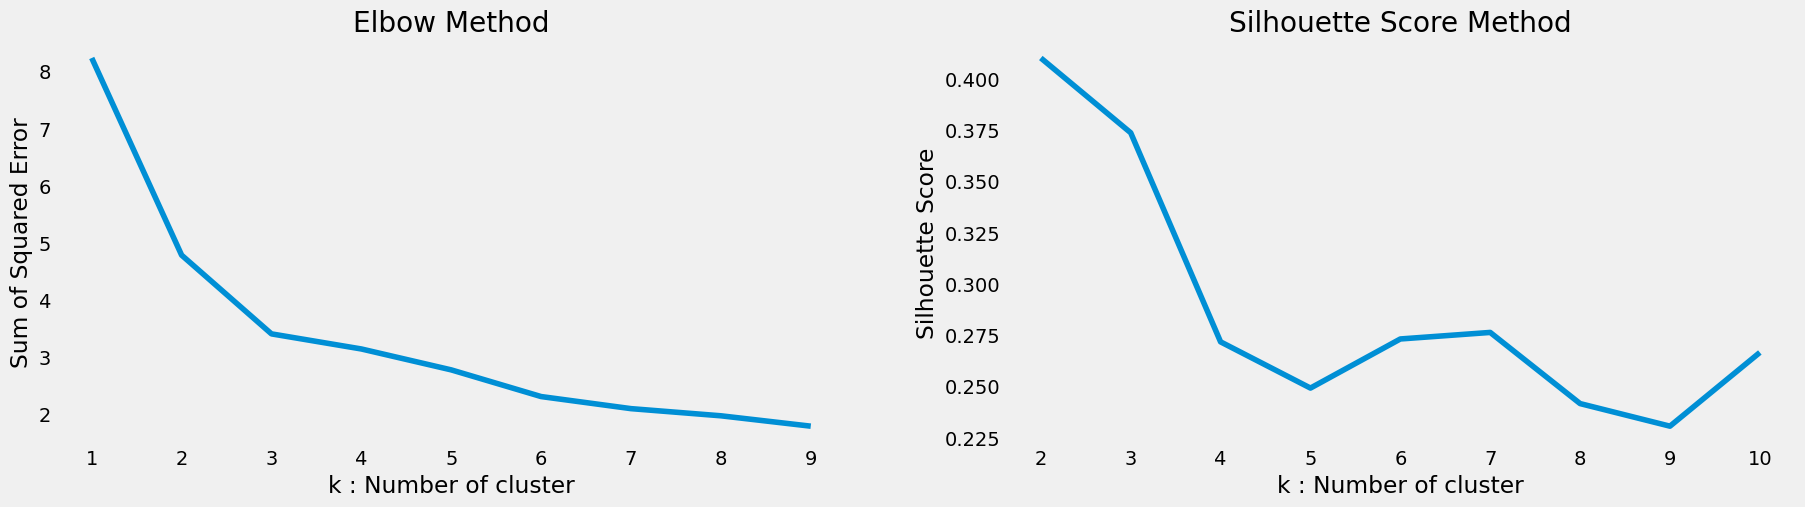

In [81]:
from sklearn.cluster import KMeans
sse = {};sil = [];kmax = 10
fig = plt.subplots(nrows = 1, ncols = 2, figsize = (20,5))

# Elbow Method :
plt.subplot(1,2,1)
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(d2)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
sns.lineplot(x = list(sse.keys()), y = list(sse.values()));
plt.title('Elbow Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Sum of Squared Error")
plt.grid()

# Silhouette Score Method
plt.subplot(1,2,2)
for k in range(2, kmax + 1):
    kmeans = KMeans(n_clusters = k).fit(d2)
    labels = kmeans.labels_
    sil.append(silhouette_score(d2, labels, metric = 'euclidean'))
sns.lineplot(x = range(2,kmax + 1), y = sil);
plt.title('Silhouette Score Method')
plt.xlabel("k : Number of cluster")
plt.ylabel("Silhouette Score")
plt.grid()

plt.show()


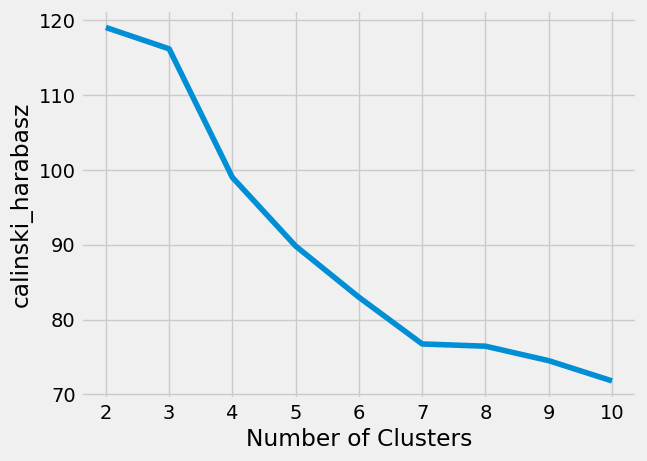

calinski_harabaz: 119.06724866390073


In [188]:
calinski_harabaz = []
for k in range (2,11):
    kmeans = KMeans(n_clusters=k,init= "random", random_state = 1)
    kmeans.fit(d2)
    metrics.calinski_harabasz_score(d2, kmeans.labels_)
    calinski_harabaz.append(metrics.calinski_harabasz_score(d2, kmeans.labels_))
plt.style.use("fivethirtyeight")
plt.plot(range(2,11), calinski_harabaz)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("calinski_harabasz")
plt.show()
print('calinski_harabaz:',max(calinski_harabaz))

In [223]:
model2 = KMeans(n_clusters = 3,init='k-means++', max_iter = 1000)
model2.fit(d2)

KMeans(max_iter=1000, n_clusters=3)

In [225]:
cluster = model2.cluster_centers_
centroids = np.array(cluster)
labels = model2.labels_
df_pca['Class'] = labels
df['Class'] = labels

In [209]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Class  
0       9.44        56.2       5.82    553      1  
1       4.49        76.3       1.65   4090      0  
2      16.10        76.5       2.89   4460      0  
3      22.40        60.1       6.16   3530      1  
4       1.44        76.8       2.13  12200      0

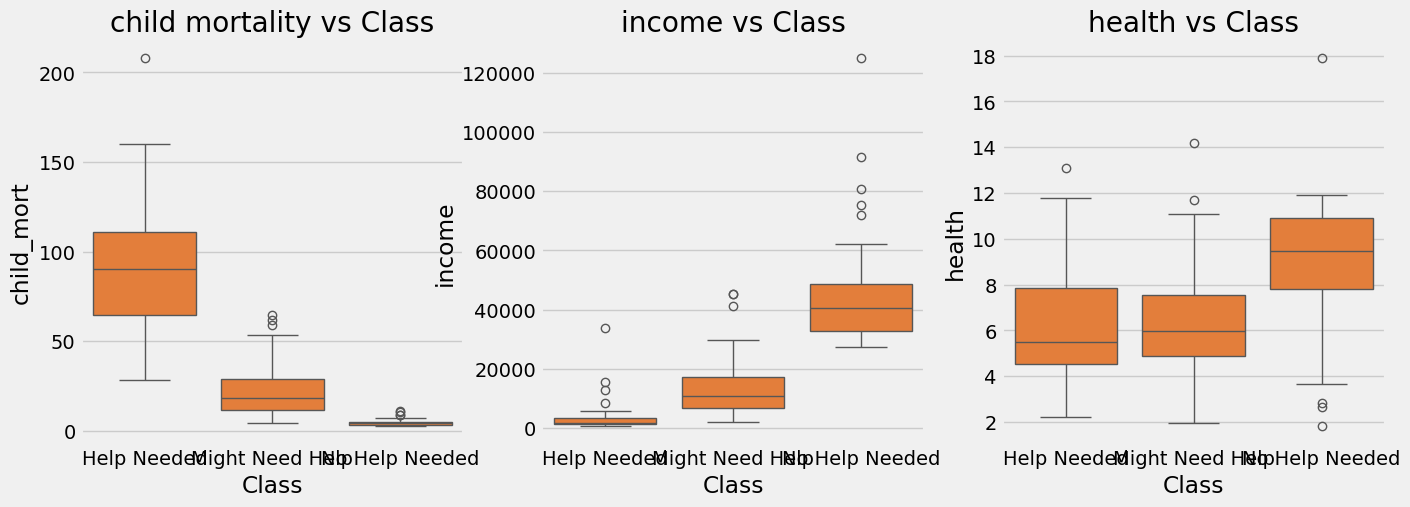

In [235]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = df, color = '#FF781F');
plt.title('child mortality vs Class')

plt.subplot(1,3,2)
sns.boxplot(x = 'Class', y = 'income', data  = df, color = '#FF781F');
plt.title('income vs Class')

plt.subplot(1,3,3)
sns.boxplot(x = 'Class', y = 'health', data  = df, color = '#FF781F');
plt.title('health vs Class')


plt.show()

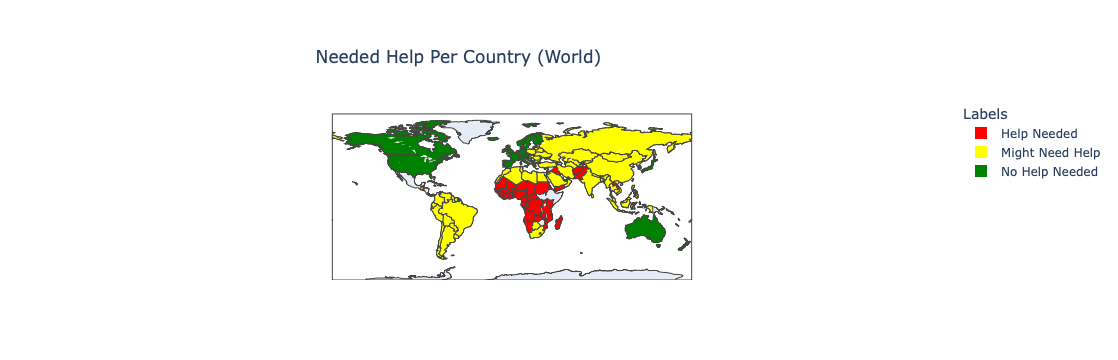

In [237]:
df['Class'].loc[df['Class'] == 2] = 'No Help Needed'
df['Class'].loc[df['Class'] == 1] = 'Might Need Help'
df['Class'].loc[df['Class'] == 0] = 'Help Needed'

fig = px.choropleth(df[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [239]:
print(df['Class'].value_counts())

Class
Might Need Help    87
Help Needed        46
No Help Needed     34
Name: count, dtype: int64


## Hierarchial clustering

### using combined data

In [243]:
from scipy.cluster.hierarchy import dendrogram, linkage

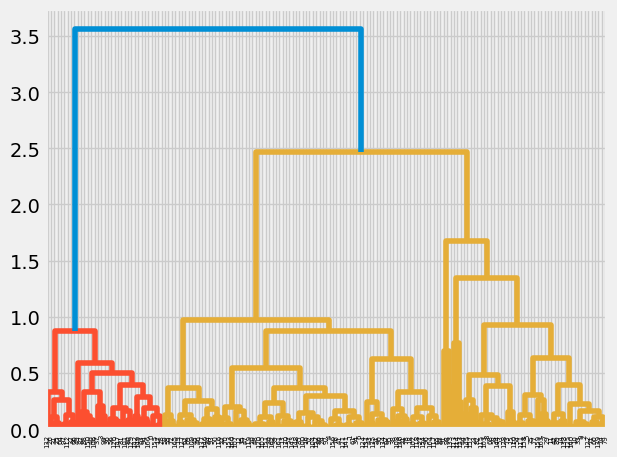

In [245]:
linkage_data = linkage(d1, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [272]:
from sklearn.cluster import AgglomerativeClustering
model3 = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
labels = model3.fit(d1)

pred_agc = pd.Series(model3.labels_)
df_combined['Class'] = pred_agc

In [257]:
df_combined.head()

country  Fertility     Trade   Finance  Class
0          Afghanistan   0.625740  0.139614  0.079820      1
1              Albania   0.127451  0.199901  0.088756      2
2              Algeria   0.182485  0.186622  0.212808      0
3               Angola   0.661381  0.283058  0.236946      1
4  Antigua and Barbuda   0.116409  0.275189  0.145043      2

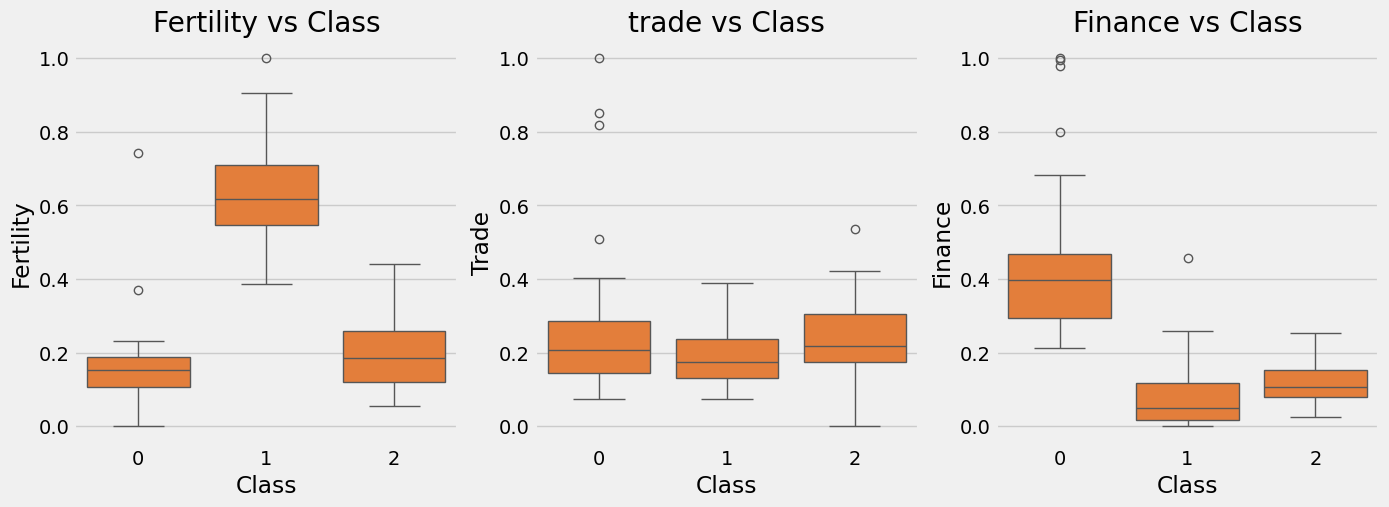

In [259]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Class', y = 'Fertility', data  = df_combined, color = '#FF781F');
plt.title('Fertility vs Class')

plt.subplot(1,3,2)
sns.boxplot(x = 'Class', y = 'Trade', data  = df_combined, color = '#FF781F');
plt.title('trade vs Class')

plt.subplot(1,3,3)
sns.boxplot(x = 'Class', y = 'Finance', data  = df_combined, color = '#FF781F');
plt.title('Finance vs Class')


plt.show()

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2951084335.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2951084335.py:1: SettingWithCopyWarning:


A value

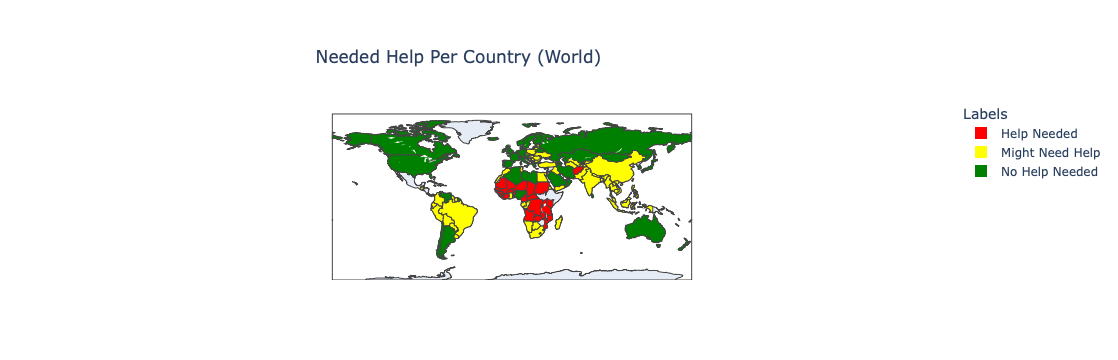

In [261]:
df_combined['Class'].loc[df_combined['Class'] == 0] = 'No Help Needed'
df_combined['Class'].loc[df_combined['Class'] == 2] = 'Might Need Help'
df_combined['Class'].loc[df_combined['Class'] == 1] = 'Help Needed'

fig = px.choropleth(df_combined[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df_combined['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [263]:
print(df_combined['Class'].value_counts())

Class
Might Need Help    83
No Help Needed     49
Help Needed        35
Name: count, dtype: int64


### using pca data

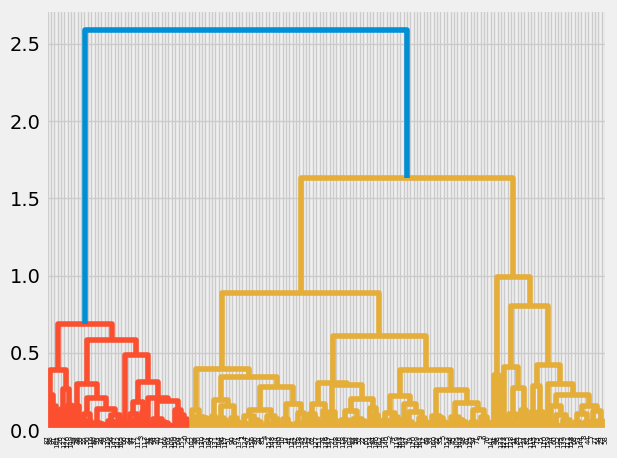

In [266]:
linkage_data = linkage(d2, method = 'ward', metric = 'euclidean')
dendrogram(linkage_data)
plt.tight_layout()
plt.show()

In [276]:
from sklearn.cluster import AgglomerativeClustering
model4 = AgglomerativeClustering(n_clusters = 3, metric = 'euclidean', linkage = 'ward')
labels = model4.fit(d2)

pred_agc = pd.Series(model4.labels_)
df['Class'] = pred_agc

In [278]:
df.head()

country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  Class  
0       9.44        56.2       5.82    553      1  
1       4.49        76.3       1.65   4090      2  
2      16.10        76.5       2.89   4460      2  
3      22.40        60.1       6.16   3530      1  
4       1.44        76.8       2.13  12200      2

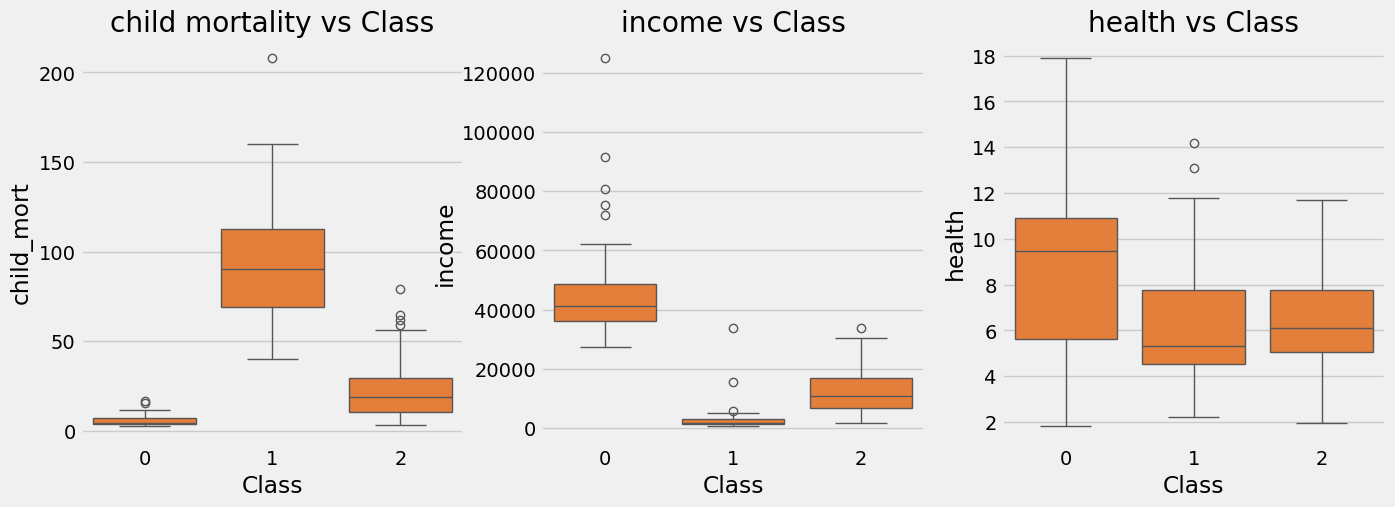

In [280]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (15,5))

plt.subplot(1,3,1)
sns.boxplot(x = 'Class', y = 'child_mort', data  = df, color = '#FF781F');
plt.title('child mortality vs Class')

plt.subplot(1,3,2)
sns.boxplot(x = 'Class', y = 'income', data  = df, color = '#FF781F');
plt.title('income vs Class')

plt.subplot(1,3,3)
sns.boxplot(x = 'Class', y = 'health', data  = df, color = '#FF781F');
plt.title('health vs Class')


plt.show()

/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2780384867.py:1: FutureWarning:

ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


/var/folders/09/d0wb93315n7cgs8_zf42nz300000gn/T/ipykernel_2978/2780384867.py:1: SettingWithCopyWarning:


A value

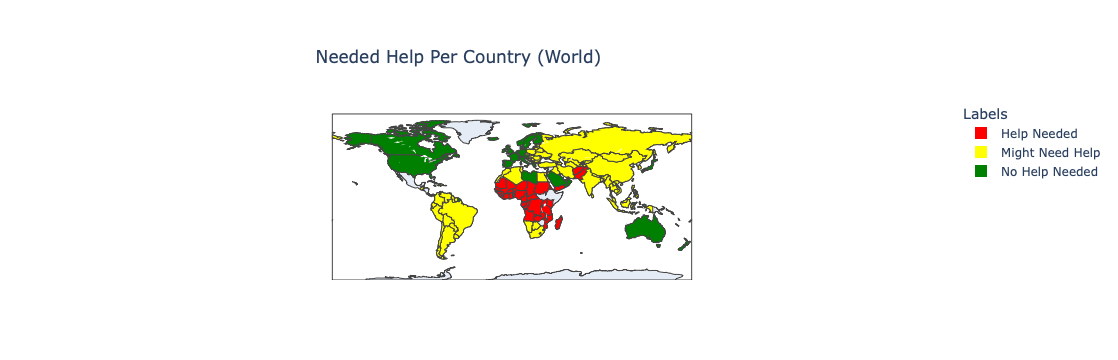

In [282]:
df['Class'].loc[df['Class'] == 0] = 'No Help Needed'
df['Class'].loc[df['Class'] == 2] = 'Might Need Help'
df['Class'].loc[df['Class'] == 1] = 'Help Needed'

fig = px.choropleth(df[['country','Class']],
                    locationmode = 'country names',
                    locations = 'country',
                    title = 'Needed Help Per Country (World)',
                    color = df['Class'],  
                    color_discrete_map = {'Help Needed':'Red',
                                        'No Help Needed':'Green',
                                        'Might Need Help':'Yellow'}
                   )
fig.update_geos(fitbounds = "locations", visible = True)
fig.update_layout(legend_title_text = 'Labels',legend_title_side = 'top',title_pad_l = 260,title_y = 0.86)
fig.show(engine = 'kaleido')

In [284]:
print(df['Class'].value_counts())

Class
Might Need Help    90
Help Needed        43
No Help Needed     34
Name: count, dtype: int64
